In [1]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as data
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [2]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [3]:
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [4]:
symbol_list = sp500['Symbol']
symbol_list

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     XYL
499     YUM
500    ZBRA
501     ZBH
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [5]:
symbol_list = symbol_list.str.replace('.','-')
symbol_list = symbol_list.unique().tolist()
symbol_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 

In [6]:
end_date = '2024-12-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)
start_date

Timestamp('2016-12-29 00:00:00')

In [7]:
df = yf.download(tickers=symbol_list,
                 start=start_date,
                 end=end_date).stack()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  503 of 503 completed


In [8]:
df

Price                   Close        High         Low        Open      Volume
Date       Ticker                                                            
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0
...                       ...         ...         ...         ...         ...
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0

[991713 rows x 5 columns]

In [23]:
df.index.names = ['date','ticker']

In [24]:
df.columns = df.columns.str.lower()

In [25]:
df

Price                   close        high         low        open      volume
date       ticker                                                            
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0
...                       ...         ...         ...         ...         ...
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0

[991713 rows x 5 columns]

In [29]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2)/2 - (2*np.log(2)-1)*(np.log(df['close'])-np.log(df['open']))**2

In [30]:
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol  
date       ticker                    
2016-12-29 A               0.000044  
           AAPL            0.000016  
           ABBV            0.000046  
           ABT             0.000054  
           ACGL            0.000042  
...                             ...  
2024-12-26 XYL             0.000037  
           YUM             0.000127  
           ZBH             0.000097  
           ZBRA            0.000041  
           ZTS             0.000096  

[991713 rows x 6 columns]

In [32]:
df['rsi'] = df.groupby('ticker')['close'].transform(lambda x: pandas_ta.rsi(close=x, length=14))

In [33]:
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol        rsi  
date       ticker                               
2016-12-29 A               0.000044        NaN  
           AAPL            0.000016        NaN  
           ABBV            0.000046        NaN  
           ABT             0.000054        NaN  
           ACGL            0.000042        NaN  
...                             ...        ...  
2024-12-26 XYL             0.000037  37.517678  
           YUM             0.000127  52.306751  
           ZBH             0.000097  46.699884  
           ZBRA            0.000041  50.567690  
           ZTS             0.000096  33.659956  

[991713 rows x 7 columns]

In [37]:
df.index

MultiIndex([('2016-12-29',    'A'),
            ('2016-12-29', 'AAPL'),
            ('2016-12-29', 'ABBV'),
            ('2016-12-29',  'ABT'),
            ('2016-12-29', 'ACGL'),
            ('2016-12-29',  'ACN'),
            ('2016-12-29', 'ADBE'),
            ('2016-12-29',  'ADI'),
            ('2016-12-29',  'ADM'),
            ('2016-12-29',  'ADP'),
            ...
            ('2024-12-26',  'WTW'),
            ('2024-12-26',   'WY'),
            ('2024-12-26', 'WYNN'),
            ('2024-12-26',  'XEL'),
            ('2024-12-26',  'XOM'),
            ('2024-12-26',  'XYL'),
            ('2024-12-26',  'YUM'),
            ('2024-12-26',  'ZBH'),
            ('2024-12-26', 'ZBRA'),
            ('2024-12-26',  'ZTS')],
           names=['date', 'ticker'], length=991713)

<Axes: xlabel='date'>

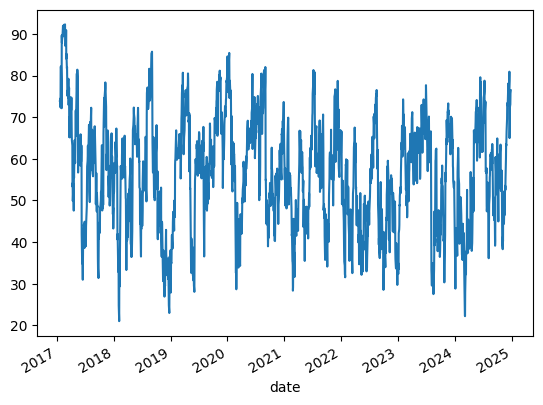

In [46]:
df.xs('AAPL',level='ticker')['rsi'].plot()

In [47]:
pandas_ta.bbands(close=df.xs('AAPL',level='ticker')['close'], length=20)

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
date,,,,,
2016-12-29,NaN,NaN,NaN,NaN,NaN
2016-12-30,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-19,228.087470,242.192212,256.296954,11.647560,0.759609
2024-12-20,229.986285,243.489286,256.992287,11.091248,0.896994
2024-12-23,231.957103,244.757892,257.558681,10.459960,0.899654


In [50]:
df['bb_low'] = df.groupby('ticker')['close'].transform(lambda x: pandas_ta.bbands(close= np.log(x), length=20).iloc[:,0])
df['bb_high'] = df.groupby('ticker')['close'].transform(lambda x: pandas_ta.bbands(close= np.log(x), length=20).iloc[:,2])
df['bb_mid'] = df.groupby('ticker')['close'].transform(lambda x: pandas_ta.bbands(close= np.log(x), length=20).iloc[:,1])
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol        rsi    bb_low   bb_high    bb_mid  
date       ticker                                                             
2016-12-29 A               0.000044        NaN       NaN       NaN       NaN  
           AAPL            0.000016        NaN       NaN       NaN       NaN  
           ABBV            0.000046        NaN       NaN       NaN       NaN  
           ABT             0.000054        NaN       NaN       NaN       NaN  
           ACGL            0.000042        NaN       NaN       NaN       NaN  
...                             ...        ...       ...       ...       ...  
2024-12-26 XYL             0.000037  37.517678  4.735853  4.878082  4.806967  
           YUM             0.000127  52.306751  4.872102  4.949209  4.910655  
           ZBH             0.000097  46.699884  4.647669  4.717889  4.682779  
           ZBRA            0.000041  50.567690  5.953409  6.036714  5.995062  
           ZTS             0.000096  33.659956  5.085375  5.212896  5.149136  

[991713 rows x 10 columns]

In [51]:
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'], low=stock_data['low'], close=stock_data['close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level = 'ticker', group_keys= False).apply(compute_atr)
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2016-12-29 A               0.000044        NaN       NaN       NaN       NaN   
           AAPL            0.000016        NaN       NaN       NaN       NaN   
           ABBV            0.000046        NaN       NaN       NaN       NaN   
           ABT             0.000054        NaN       NaN       NaN       NaN   
           ACGL            0.000042        NaN       NaN       NaN       NaN   
...                             ...        ...       ...       ...       ...   
2024-12-26 XYL             0.000037  37.517678  4.735853  4.878082  4.806967   
           YUM             0.000127  52.306751  4.872102  4.949209  4.910655   
           ZBH             0.000097  46.699884  4.647669  4.717889  4.682779   
           ZBRA            0.000041  50.567690  5.953409  6.036714  5.995062   
           ZTS             0.000096  33.659956  5.085375  5.212896  5.149136   

Price                   atr  
date       ticker            
2016-12-29 A            NaN  
           AAPL         NaN  
           ABBV         NaN  
           ABT          NaN  
           ACGL         NaN  
...                     ...  
2024-12-26 XYL     0.616731  
           YUM     0.806548  
           ZBH    -0.539860  
           ZBRA    0.000369  
           ZTS     0.472448  

[991713 rows x 11 columns]

In [53]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length = 20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level = 'ticker', group_keys=False)['close'].apply(compute_macd)
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2016-12-29 A               0.000044        NaN       NaN       NaN       NaN   
           AAPL            0.000016        NaN       NaN       NaN       NaN   
           ABBV            0.000046        NaN       NaN       NaN       NaN   
           ABT             0.000054        NaN       NaN       NaN       NaN   
           ACGL            0.000042        NaN       NaN       NaN       NaN   
...                             ...        ...       ...       ...       ...   
2024-12-26 XYL             0.000037  37.517678  4.735853  4.878082  4.806967   
           YUM             0.000127  52.306751  4.872102  4.949209  4.910655   
           ZBH             0.000097  46.699884  4.647669  4.717889  4.682779   
           ZBRA            0.000041  50.567690  5.953409  6.036714  5.995062   
           ZTS             0.000096  33.659956  5.085375  5.212896  5.149136   

Price                   atr      macd  
date       ticker                      
2016-12-29 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2024-12-26 XYL     0.616731 -1.532450  
           YUM     0.806548 -0.496231  
           ZBH    -0.539860 -0.273378  
           ZBRA    0.000369 -0.152269  
           ZTS     0.472448 -1.639642  

[991713 rows x 12 columns]

In [89]:
df['dollar_volume'] = (df['close']*df['volume'])/10**6
df

Price                   close        high         low        open      volume  \
date       ticker                                                               
2016-12-29 A        42.944084   43.282820   42.878219   42.981722    891000.0   
           AAPL     26.996561   27.084444   26.920240   26.931803  60158000.0   
           ABBV     44.076599   44.308472   43.837701   43.837701   4990000.0   
           ABT      32.974739   33.146883   32.802592   32.966130   7050800.0   
           ACGL     27.287619   27.395387   27.135475   27.205208    731100.0   
...                       ...         ...         ...         ...         ...   
2024-12-26 XYL     118.103729  118.352956  117.176604  117.435803    575700.0   
           YUM     135.360367  136.156607  133.568830  133.718133   1040900.0   
           ZBH     107.009148  107.877197  106.370586  106.759709   1277300.0   
           ZBRA    396.850006  397.500000  392.109985  392.269989    140100.0   
           ZTS     165.021118  165.290293  162.528653  163.226540   2167200.0   

Price              garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2016-12-29 A               0.000044        NaN       NaN       NaN       NaN   
           AAPL            0.000016        NaN       NaN       NaN       NaN   
           ABBV            0.000046        NaN       NaN       NaN       NaN   
           ABT             0.000054        NaN       NaN       NaN       NaN   
           ACGL            0.000042        NaN       NaN       NaN       NaN   
...                             ...        ...       ...       ...       ...   
2024-12-26 XYL             0.000037  37.517678  4.735853  4.878082  4.806967   
           YUM             0.000127  52.306751  4.872102  4.949209  4.910655   
           ZBH             0.000097  46.699884  4.647669  4.717889  4.682779   
           ZBRA            0.000041  50.567690  5.953409  6.036714  5.995062   
           ZTS             0.000096  33.659956  5.085375  5.212896  5.149136   

Price                   atr      macd  dollar_volume  
date       ticker                                     
2016-12-29 A            NaN       NaN      38.263179  
           AAPL         NaN       NaN    1624.059120  
           ABBV         NaN       NaN     219.942230  
           ABT          NaN       NaN     232.498290  
           ACGL         NaN       NaN      19.949978  
...                     ...       ...            ...  
2024-12-26 XYL     0.616731 -1.532450      67.992317  
           YUM     0.806548 -0.496231     140.896606  
           ZBH    -0.539860 -0.273378     136.682784  
           ZBRA    0.000369 -0.152269      55.598686  
           ZTS     0.472448 -1.639642     357.633767  

[991713 rows x 13 columns]

In [90]:
df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume')

dollar_volume
date       ticker               
2016-12-31 A           45.197969
           AAPL      2450.604731
           ABBV       241.951455
           ABT        288.919164
           ACGL        32.527265
...                          ...
2024-12-31 XYL        176.636778
           YUM        213.981619
           ZBH        170.476623
           ZBRA       123.775856
           ZTS        431.762746

[47832 rows x 1 columns]

In [62]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume','volume','open','high','low']]
last_cols

['close',
 'garman_klass_vol',
 'rsi',
 'bb_low',
 'bb_high',
 'bb_mid',
 'atr',
 'macd']

In [91]:
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), 
           df.unstack()[last_cols].resample('M').last().stack('ticker')], axis=1)).dropna()
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-02-28 A           98.277650   48.269749          0.000026  62.749988   
           AAPL      3726.099877   31.819536          0.000014  87.773082   
           ABBV       290.304900   43.889675          0.000058  54.936719   
           ABT        330.794746   39.052559          0.000068  74.703429   
           ACGL        34.503753   29.975491          0.000039  76.747782   
...                          ...         ...               ...        ...   
2024-12-31 XYL        176.636778  118.103729          0.000037  37.517678   
           YUM        213.981619  135.360367          0.000127  52.306751   
           ZBH        170.476623  107.009148          0.000097  46.699884   
           ZBRA       123.775856  396.850006          0.000041  50.567690   
           ZTS        431.762746  165.021118          0.000096  33.659956   

                     bb_low   bb_high    bb_mid       atr      macd  
date       ticker                                                    
2017-02-28 A       3.822397  3.899487  3.860942 -1.551435  0.293665  
           AAPL    3.365445  3.493110  3.429277 -1.446279  0.117520  
           ABBV    3.752203  3.790355  3.771279 -1.700384 -0.216258  
           ABT     3.577190  3.689721  3.633456 -1.579749  0.663476  
           ACGL    3.338508  3.418938  3.378723 -1.184842  0.349438  
...                     ...       ...       ...       ...       ...  
2024-12-31 XYL     4.735853  4.878082  4.806967  0.616731 -1.532450  
           YUM     4.872102  4.949209  4.910655  0.806548 -0.496231  
           ZBH     4.647669  4.717889  4.682779 -0.539860 -0.273378  
           ZBRA    5.953409  6.036714  5.995062  0.000369 -0.152269  
           ZTS     5.085375  5.212896  5.149136  0.472448 -1.639642  

[46845 rows x 9 columns]

In [92]:
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-02-28 A           98.277650   48.269749          0.000026  62.749988   
           AAPL      3726.099877   31.819536          0.000014  87.773082   
           ABBV       290.304900   43.889675          0.000058  54.936719   
           ABT        330.794746   39.052559          0.000068  74.703429   
           ACGL        34.503753   29.975491          0.000039  76.747782   
...                          ...         ...               ...        ...   
2024-12-31 XYL        176.636778  118.103729          0.000037  37.517678   
           YUM        213.981619  135.360367          0.000127  52.306751   
           ZBH        170.476623  107.009148          0.000097  46.699884   
           ZBRA       123.775856  396.850006          0.000041  50.567690   
           ZTS        431.762746  165.021118          0.000096  33.659956   

                     bb_low   bb_high    bb_mid       atr      macd  
date       ticker                                                    
2017-02-28 A       3.822397  3.899487  3.860942 -1.551435  0.293665  
           AAPL    3.365445  3.493110  3.429277 -1.446279  0.117520  
           ABBV    3.752203  3.790355  3.771279 -1.700384 -0.216258  
           ABT     3.577190  3.689721  3.633456 -1.579749  0.663476  
           ACGL    3.338508  3.418938  3.378723 -1.184842  0.349438  
...                     ...       ...       ...       ...       ...  
2024-12-31 XYL     4.735853  4.878082  4.806967  0.616731 -1.532450  
           YUM     4.872102  4.949209  4.910655  0.806548 -0.496231  
           ZBH     4.647669  4.717889  4.682779 -0.539860 -0.273378  
           ZBRA    5.953409  6.036714  5.995062  0.000369 -0.152269  
           ZTS     5.085375  5.212896  5.149136  0.472448 -1.639642  

[46845 rows x 9 columns]

In [93]:
data['dollar_volume'] = data.loc[:,'dollar_volume'].unstack('ticker').rolling(12*5, min_periods=12).mean().stack()
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-02-28 A                 NaN   48.269749          0.000026  62.749988   
           AAPL              NaN   31.819536          0.000014  87.773082   
           ABBV              NaN   43.889675          0.000058  54.936719   
           ABT               NaN   39.052559          0.000068  74.703429   
           ACGL              NaN   29.975491          0.000039  76.747782   
...                          ...         ...               ...        ...   
2024-12-31 XYL        122.491653  118.103729          0.000037  37.517678   
           YUM        201.151280  135.360367          0.000127  52.306751   
           ZBH        178.548507  107.009148          0.000097  46.699884   
           ZBRA       124.881654  396.850006          0.000041  50.567690   
           ZTS        344.932256  165.021118          0.000096  33.659956   

                     bb_low   bb_high    bb_mid       atr      macd  
date       ticker                                                    
2017-02-28 A       3.822397  3.899487  3.860942 -1.551435  0.293665  
           AAPL    3.365445  3.493110  3.429277 -1.446279  0.117520  
           ABBV    3.752203  3.790355  3.771279 -1.700384 -0.216258  
           ABT     3.577190  3.689721  3.633456 -1.579749  0.663476  
           ACGL    3.338508  3.418938  3.378723 -1.184842  0.349438  
...                     ...       ...       ...       ...       ...  
2024-12-31 XYL     4.735853  4.878082  4.806967  0.616731 -1.532450  
           YUM     4.872102  4.949209  4.910655  0.806548 -0.496231  
           ZBH     4.647669  4.717889  4.682779 -0.539860 -0.273378  
           ZBRA    5.953409  6.036714  5.995062  0.000369 -0.152269  
           ZTS     5.085375  5.212896  5.149136  0.472448 -1.639642  

[46845 rows x 9 columns]

In [94]:
data['dollar_volume_rank'] = data.groupby('date')['dollar_volume'].rank(ascending=False)
data

dollar_volume       close  garman_klass_vol        rsi  \
date       ticker                                                           
2017-02-28 A                 NaN   48.269749          0.000026  62.749988   
           AAPL              NaN   31.819536          0.000014  87.773082   
           ABBV              NaN   43.889675          0.000058  54.936719   
           ABT               NaN   39.052559          0.000068  74.703429   
           ACGL              NaN   29.975491          0.000039  76.747782   
...                          ...         ...               ...        ...   
2024-12-31 XYL        122.491653  118.103729          0.000037  37.517678   
           YUM        201.151280  135.360367          0.000127  52.306751   
           ZBH        178.548507  107.009148          0.000097  46.699884   
           ZBRA       124.881654  396.850006          0.000041  50.567690   
           ZTS        344.932256  165.021118          0.000096  33.659956   

                     bb_low   bb_high    bb_mid       atr      macd  \
date       ticker                                                     
2017-02-28 A       3.822397  3.899487  3.860942 -1.551435  0.293665   
           AAPL    3.365445  3.493110  3.429277 -1.446279  0.117520   
           ABBV    3.752203  3.790355  3.771279 -1.700384 -0.216258   
           ABT     3.577190  3.689721  3.633456 -1.579749  0.663476   
           ACGL    3.338508  3.418938  3.378723 -1.184842  0.349438   
...                     ...       ...       ...       ...       ...   
2024-12-31 XYL     4.735853  4.878082  4.806967  0.616731 -1.532450   
           YUM     4.872102  4.949209  4.910655  0.806548 -0.496231   
           ZBH     4.647669  4.717889  4.682779 -0.539860 -0.273378   
           ZBRA    5.953409  6.036714  5.995062  0.000369 -0.152269   
           ZTS     5.085375  5.212896  5.149136  0.472448 -1.639642   

                   dollar_volume_rank  
date       ticker                      
2017-02-28 A                      NaN  
           AAPL                   NaN  
           ABBV                   NaN  
           ABT                    NaN  
           ACGL                   NaN  
...                               ...  
2024-12-31 XYL                  392.0  
           YUM                  269.0  
           ZBH                  294.0  
           ZBRA                 386.0  
           ZTS                  149.0  

[46845 rows x 10 columns]

In [95]:
data = data[data['dollar_volume_rank'] < 150].drop(['dollar_volume','dollar_volume_rank'], axis=1)
data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-01-31 AAPL     39.344826          0.000063  34.496664  3.669768   
           ABBV     82.313698          0.000575  60.960588  4.212832   
           ABT      55.006336          0.000082  69.546629  3.911977   
           ACN     144.842743          0.000023  60.728547  4.945658   
           ADBE    199.759995          0.000156  66.539930  5.198444   
...                       ...               ...        ...       ...   
2024-12-31 WDAY    269.380005          0.000102  52.492458  5.524290   
           WFC      71.407463          0.000044  52.166673  4.214361   
           WMT      92.790001          0.000027  55.432317  4.510158   
           XOM     105.545921          0.000052  24.296816  4.625304   
           ZTS     165.021118          0.000096  33.659956  5.085375   

                    bb_high    bb_mid       atr      macd  
date       ticker                                          
2018-01-31 AAPL    3.752577  3.711172 -1.245794 -0.430039  
           ABBV    4.479975  4.346403  0.532974  1.689172  
           ABT     4.031762  3.971869 -0.982832  0.888201  
           ACN     4.992896  4.969277 -1.248465  0.243561  
           ADBE    5.327308  5.262876 -1.283856  0.406553  
...                     ...       ...       ...       ...  
2024-12-31 WDAY    5.653111  5.588700  1.396000  0.515571  
           WFC     4.336487  4.275424  1.848731 -0.202204  
           WMT     4.566291  4.538224  3.256346  1.711857  
           XOM     4.781075  4.703189  0.426663 -2.685966  
           ZTS     5.212896  5.149136  0.472448 -1.639642  

[12516 rows x 8 columns]

In [96]:
g = df.xs('AAPL', level='ticker')
g

outlier_cutoff = 0.005


lags = [1,2,3,6,9,12]

for lag in lags:
    g[f'return_{lag}m'] = g['close'].pct_change(lag).pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff), upper = x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1)
g

Price,close,high,low,open,volume,garman_klass_vol,rsi,bb_low,bb_high,bb_mid,atr,macd,dollar_volume,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
date,,,,,,,,,,,,,,,,,,,
2016-12-29,26.996561,27.084444,26.920240,26.931803,60158000.0,0.000016,NaN,NaN,NaN,NaN,NaN,NaN,1624.059120,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-30,26.786097,27.105253,26.695900,26.978054,122345200.0,0.000096,NaN,NaN,NaN,NaN,NaN,NaN,3277.150342,-0.007796,NaN,NaN,NaN,NaN,NaN
2017-01-03,26.862423,26.904052,26.540953,26.781478,115127600.0,0.000089,NaN,NaN,NaN,NaN,NaN,NaN,3092.606284,0.002849,-0.002487,NaN,NaN,NaN,NaN
2017-01-04,26.832357,26.945683,26.769914,26.793041,84472400.0,0.000021,NaN,NaN,NaN,NaN,NaN,NaN,2266.593628,-0.001119,0.000863,-0.002032,NaN,NaN,NaN
2017-01-05,26.968811,27.026629,26.783791,26.809232,88774400.0,0.000027,NaN,NaN,NaN,NaN,NaN,NaN,2394.140018,0.005085,0.001978,0.002269,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,249.515656,251.723235,246.818624,247.228177,60882300.0,0.000161,67.211811,5.430616,5.547991,5.489303,0.879216,2.020503,15191.086994,0.007015,-0.007305,-0.001663,0.002219,0.003140,0.002420
2024-12-20,254.210510,254.719945,245.420172,247.767582,147495300.0,0.000437,72.334158,5.438874,5.550496,5.494685,1.130458,2.116875,37494.855473,0.018816,0.012898,0.001326,0.004342,0.003438,0.003854
2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800.0,0.000036,73.085636,5.447399,5.552453,5.499926,1.033930,2.191681,10418.571297,0.003065,0.010910,0.009610,0.004739,0.003319,0.004100


In [97]:
def calculate_returns(df):

    outlier_cutoff = 0.005


    lags = [1,2,3,6,9,12]

    for lag in lags:
        df[f'return_{lag}m'] = df['close'].pct_change(lag).pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff), upper = x.quantile(1-outlier_cutoff))).add(1).pow(1/lag).sub(1)
    
    return df   

data = data.groupby('ticker', group_keys= False).apply(calculate_returns).dropna()
data


close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-01-31 AAPL     39.699383          0.000353  59.720392  3.534849   
           ABBV     61.498852          0.000419  40.109127  4.082569   
           ABT      65.755180          0.000151  59.373378  4.094057   
           ACN     140.895584          0.000067  59.922296  4.847532   
           ADBE    247.820007          0.000148  59.029843  5.407720   
...                       ...               ...        ...       ...   
2024-12-31 VZ       39.264240          0.000054  30.995508  3.642895   
           WDAY    269.380005          0.000102  52.492458  5.524290   
           WFC      71.407463          0.000044  52.166673  4.214361   
           WMT      92.790001          0.000027  55.432317  4.510158   
           XOM     105.545921          0.000052  24.296816  4.625304   

                    bb_high    bb_mid       atr      macd  return_1m  \
date       ticker                                                      
2019-01-31 AAPL    3.671016  3.602932 -0.874851 -0.381170   0.055154   
           ABBV    4.271188  4.176879 -0.023677 -1.043383  -0.118400   
           ABT     4.186332  4.140195 -0.159586  0.139833   0.013665   
           ACN     4.969386  4.908459 -0.792167  0.043043   0.088930   
           ADBE    5.540962  5.474341 -0.672298  0.203190   0.095385   
...                     ...       ...       ...       ...        ...   
2024-12-31 VZ      3.787300  3.715098 -0.080580 -1.566519  -0.098782   
           WDAY    5.653111  5.588700  1.396000  0.515571   0.077563   
           WFC     4.336487  4.275424  1.848731 -0.202204  -0.057897   
           WMT     4.566291  4.538224  3.256346  1.711857   0.005358   
           XOM     4.781075  4.703189  0.426663 -2.685966  -0.097236   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2019-01-31 AAPL    -0.034589  -0.086165  -0.020933   0.001996    0.000748  
           ABBV    -0.071480   0.014454  -0.019116  -0.016684   -0.024001  
           ABT     -0.004952   0.020737   0.019565   0.027107    0.014985  
           ACN     -0.033915  -0.008682  -0.004631   0.002728   -0.002300  
           ADBE    -0.006137   0.002786   0.002128   0.012503    0.018128  
...                      ...        ...        ...        ...         ...  
2024-12-31 VZ      -0.026094  -0.033200   0.000032  -0.000117    0.010280  
           WDAY     0.073282   0.032957   0.031562  -0.001380   -0.002039  
           WFC      0.054386   0.085097   0.034336   0.026188    0.034164  
           WMT      0.065263   0.048190   0.054810   0.050300    0.049563  
           XOM     -0.041158  -0.028848  -0.010234  -0.007010    0.008084  

[10367 rows x 14 columns]

In [98]:
df.index.get_level_values('date').unique()

DatetimeIndex(['2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-12',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-24', '2024-12-26'],
              dtype='datetime64[ns]', name='date', length=2011, freq=None)

In [99]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3','famafrench',start=2010)[0].drop('RF', axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-01,-3.36,0.34,0.43,-1.27,0.46
2010-02-01,3.40,1.51,3.22,-0.27,1.42
2010-03-01,6.31,1.85,2.21,-0.65,1.69
2010-04-01,2.00,4.98,2.89,0.69,1.72
2010-05-01,-7.89,0.05,-2.44,1.30,-0.22
...,...,...,...,...,...
2024-08-01,1.61,-3.65,-1.13,0.85,0.86
2024-09-01,1.74,-1.02,-2.59,0.04,-0.26
2024-10-01,-0.97,-0.88,0.89,-1.38,1.03


In [100]:
factor_data = factor_data.resample('M').last().div(100)
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0322,-0.0027,0.0142
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0005,-0.0244,0.0130,-0.0022
...,...,...,...,...,...
2024-08-31,0.0161,-0.0365,-0.0113,0.0085,0.0086
2024-09-30,0.0174,-0.0102,-0.0259,0.0004,-0.0026
2024-10-31,-0.0097,-0.0088,0.0089,-0.0138,0.0103


In [101]:
factor_data.index.name = 'date'
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0322,-0.0027,0.0142
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0005,-0.0244,0.0130,-0.0022
...,...,...,...,...,...
2024-08-31,0.0161,-0.0365,-0.0113,0.0085,0.0086
2024-09-30,0.0174,-0.0102,-0.0259,0.0004,-0.0026
2024-10-31,-0.0097,-0.0088,0.0089,-0.0138,0.0103


In [102]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2019-01-31 AAPL    0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.055154
           ABBV    0.0840  0.0301 -0.0045 -0.0078 -0.0152  -0.118400
           ABT     0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.013665
           ACN     0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.088930
           ADBE    0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.095385
...                   ...     ...     ...     ...     ...        ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.098782
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.0110   0.077563
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.057897
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   0.005358
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.097236

[10367 rows x 6 columns]

In [103]:
factor_data.xs('AAPL', level='ticker')

,Mkt-RF,SMB,HML,RMW,CMA,return_1m
date,,,,,,
2019-01-31,0.0840,0.0301,-0.0045,-0.0078,-0.0152,0.055154
2019-02-28,0.0340,0.0175,-0.0271,0.0012,-0.0160,0.044776
2019-03-31,0.0110,-0.0351,-0.0412,0.0091,-0.0094,0.097026
2019-04-30,0.0397,-0.0115,0.0216,0.0159,-0.0222,0.056436
2019-05-31,-0.0694,-0.0159,-0.0237,-0.0046,0.0177,-0.124213
...,...,...,...,...,...,...
2024-08-31,0.0161,-0.0365,-0.0113,0.0085,0.0086,0.032353
2024-09-30,0.0174,-0.0102,-0.0259,0.0004,-0.0026,0.017467
2024-10-31,-0.0097,-0.0088,0.0089,-0.0138,0.0103,-0.030429


In [105]:
observations = factor_data.groupby(level='ticker').size()
valid_tickers = observations[observations >= 10]
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_tickers.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2019-01-31 AAPL    0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.055154
           ABBV    0.0840  0.0301 -0.0045 -0.0078 -0.0152  -0.118400
           ABT     0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.013665
           ACN     0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.088930
           ADBE    0.0840  0.0301 -0.0045 -0.0078 -0.0152   0.095385
...                   ...     ...     ...     ...     ...        ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.098782
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.0110   0.077563
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.057897
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.0110   0.005358
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.0110  -0.097236

[10328 rows x 6 columns]

In [109]:
betas = factor_data.groupby(level='ticker', group_keys=False).apply(lambda x: RollingOLS(endog=x['return_1m'], exog=sm.add_constant(x.drop('return_1m', axis=1)), window=min(24,x.shape[0]),min_nobs=len(x.columns)+1).fit(params_only=True).params.drop('const', axis=1))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2019-01-31 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-12-31 VZ      1.224523 -0.869013  0.805976  0.672708 -0.500098
           WDAY    0.912738 -1.318146  0.546870 -2.283833 -1.547501
           WFC     0.397090  0.050847  0.836942 -2.255774 -0.051545
           WMT     0.701421  0.340717 -0.598394  1.167348  0.769122
           XOM     0.706531  0.038469  0.268808  1.166997  0.725819

[10328 rows x 5 columns]

In [112]:
data = data.join(betas.groupby(level='ticker').shift())
data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-01-31 AAPL     39.699383          0.000353  59.720392  3.534849   
           ABBV     61.498852          0.000419  40.109127  4.082569   
           ABT      65.755180          0.000151  59.373378  4.094057   
           ACN     140.895584          0.000067  59.922296  4.847532   
           ADBE    247.820007          0.000148  59.029843  5.407720   
...                       ...               ...        ...       ...   
2024-12-31 VZ       39.264240          0.000054  30.995508  3.642895   
           WDAY    269.380005          0.000102  52.492458  5.524290   
           WFC      71.407463          0.000044  52.166673  4.214361   
           WMT      92.790001          0.000027  55.432317  4.510158   
           XOM     105.545921          0.000052  24.296816  4.625304   

                    bb_high    bb_mid       atr      macd  return_1m  \
date       ticker                                                      
2019-01-31 AAPL    3.671016  3.602932 -0.874851 -0.381170   0.055154   
           ABBV    4.271188  4.176879 -0.023677 -1.043383  -0.118400   
           ABT     4.186332  4.140195 -0.159586  0.139833   0.013665   
           ACN     4.969386  4.908459 -0.792167  0.043043   0.088930   
           ADBE    5.540962  5.474341 -0.672298  0.203190   0.095385   
...                     ...       ...       ...       ...        ...   
2024-12-31 VZ      3.787300  3.715098 -0.080580 -1.566519  -0.098782   
           WDAY    5.653111  5.588700  1.396000  0.515571   0.077563   
           WFC     4.336487  4.275424  1.848731 -0.202204  -0.057897   
           WMT     4.566291  4.538224  3.256346  1.711857   0.005358   
           XOM     4.781075  4.703189  0.426663 -2.685966  -0.097236   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2019-01-31 AAPL    -0.034589  -0.086165  -0.020933   0.001996    0.000748   
           ABBV    -0.071480   0.014454  -0.019116  -0.016684   -0.024001   
           ABT     -0.004952   0.020737   0.019565   0.027107    0.014985   
           ACN     -0.033915  -0.008682  -0.004631   0.002728   -0.002300   
           ADBE    -0.006137   0.002786   0.002128   0.012503    0.018128   
...                      ...        ...        ...        ...         ...   
2024-12-31 VZ      -0.026094  -0.033200   0.000032  -0.000117    0.010280   
           WDAY     0.073282   0.032957   0.031562  -0.001380   -0.002039   
           WFC      0.054386   0.085097   0.034336   0.026188    0.034164   
           WMT      0.065263   0.048190   0.054810   0.050300    0.049563   
           XOM     -0.041158  -0.028848  -0.010234  -0.007010    0.008084   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2019-01-31 AAPL         NaN       NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN       NaN  
           ACN          NaN       NaN       NaN       NaN       NaN  
           ADBE         NaN       NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...       ...  
2024-12-31 VZ      0.885510 -0.607195  0.299290  0.505134  0.276425  
           WDAY    0.760261 -1.023756  0.151963 -2.488470 -0.729054  
           WFC     0.723369 -0.312742  1.430125 -2.012817 -1.095359  
           WMT     0.844683  0.175307 -0.332489  1.278244  0.295491  
           XOM     0.614502  0.031073  0.205460  1.178936  0.728172  

[10367 rows x 19 columns]

In [113]:
factors = ['Mkt-RF','SMB','HML','RMW','CMA']
data.loc[:,factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data

close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2019-01-31 AAPL     39.699383          0.000353  59.720392  3.534849   
           ABBV     61.498852          0.000419  40.109127  4.082569   
           ABT      65.755180          0.000151  59.373378  4.094057   
           ACN     140.895584          0.000067  59.922296  4.847532   
           ADBE    247.820007          0.000148  59.029843  5.407720   
...                       ...               ...        ...       ...   
2024-12-31 VZ       39.264240          0.000054  30.995508  3.642895   
           WDAY    269.380005          0.000102  52.492458  5.524290   
           WFC      71.407463          0.000044  52.166673  4.214361   
           WMT      92.790001          0.000027  55.432317  4.510158   
           XOM     105.545921          0.000052  24.296816  4.625304   

                    bb_high    bb_mid       atr      macd  return_1m  \
date       ticker                                                      
2019-01-31 AAPL    3.671016  3.602932 -0.874851 -0.381170   0.055154   
           ABBV    4.271188  4.176879 -0.023677 -1.043383  -0.118400   
           ABT     4.186332  4.140195 -0.159586  0.139833   0.013665   
           ACN     4.969386  4.908459 -0.792167  0.043043   0.088930   
           ADBE    5.540962  5.474341 -0.672298  0.203190   0.095385   
...                     ...       ...       ...       ...        ...   
2024-12-31 VZ      3.787300  3.715098 -0.080580 -1.566519  -0.098782   
           WDAY    5.653111  5.588700  1.396000  0.515571   0.077563   
           WFC     4.336487  4.275424  1.848731 -0.202204  -0.057897   
           WMT     4.566291  4.538224  3.256346  1.711857   0.005358   
           XOM     4.781075  4.703189  0.426663 -2.685966  -0.097236   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2019-01-31 AAPL    -0.034589  -0.086165  -0.020933   0.001996    0.000748   
           ABBV    -0.071480   0.014454  -0.019116  -0.016684   -0.024001   
           ABT     -0.004952   0.020737   0.019565   0.027107    0.014985   
           ACN     -0.033915  -0.008682  -0.004631   0.002728   -0.002300   
           ADBE    -0.006137   0.002786   0.002128   0.012503    0.018128   
...                      ...        ...        ...        ...         ...   
2024-12-31 VZ      -0.026094  -0.033200   0.000032  -0.000117    0.010280   
           WDAY     0.073282   0.032957   0.031562  -0.001380   -0.002039   
           WFC      0.054386   0.085097   0.034336   0.026188    0.034164   
           WMT      0.065263   0.048190   0.054810   0.050300    0.049563   
           XOM     -0.041158  -0.028848  -0.010234  -0.007010    0.008084   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2019-01-31 AAPL    1.283557 -0.197436 -0.638360  0.339817  0.453543  
           ABBV    0.538861  0.268728 -0.126493  0.377313  0.530364  
           ABT     0.770663 -0.038252 -0.439063  0.135734  1.030660  
           ACN     1.191128 -0.207883 -0.217047  0.321532 -0.015812  
           ADBE    1.320482 -0.574843 -0.252454  0.311418 -0.424427  
...                     ...       ...       ...       ...       ...  
2024-12-31 VZ      0.885510 -0.607195  0.299290  0.505134  0.276425  
           WDAY    0.760261 -1.023756  0.151963 -2.488470 -0.729054  
           WFC     0.723369 -0.312742  1.430125 -2.012817 -1.095359  
           WMT     0.844683  0.175307 -0.332489  1.278244  0.295491  
           XOM     0.614502  0.031073  0.205460  1.178936  0.728172  

[10367 rows x 19 columns]

In [114]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10193 entries, (Timestamp('2019-01-31 00:00:00'), 'AAPL') to (Timestamp('2024-12-31 00:00:00'), 'XOM')
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   close             10193 non-null  float64
 1   garman_klass_vol  10193 non-null  float64
 2   rsi               10193 non-null  float64
 3   bb_low            10193 non-null  float64
 4   bb_high           10193 non-null  float64
 5   bb_mid            10193 non-null  float64
 6   atr               10193 non-null  float64
 7   macd              10193 non-null  float64
 8   return_1m         10193 non-null  float64
 9   return_2m         10193 non-null  float64
 10  return_3m         10193 non-null  float64
 11  return_6m         10193 non-null  float64
 12  return_9m         10193 non-null  float64
 13  return_12m        10193 non-null  float64
 14  Mkt-RF            10193 non-null  float64
 15  SMB       

In [115]:
data = data.drop('close', axis=1)
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 AAPL            0.000353  59.720392  3.534849  3.671016  3.602932   
           ABBV            0.000419  40.109127  4.082569  4.271188  4.176879   
           ABT             0.000151  59.373378  4.094057  4.186332  4.140195   
           ACN             0.000067  59.922296  4.847532  4.969386  4.908459   
           ADBE            0.000148  59.029843  5.407720  5.540962  5.474341   
...                             ...        ...       ...       ...       ...   
2024-12-31 VZ              0.000054  30.995508  3.642895  3.787300  3.715098   
           WDAY            0.000102  52.492458  5.524290  5.653111  5.588700   
           WFC             0.000044  52.166673  4.214361  4.336487  4.275424   
           WMT             0.000027  55.432317  4.510158  4.566291  4.538224   
           XOM             0.000052  24.296816  4.625304  4.781075  4.703189   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 AAPL   -0.874851 -0.381170   0.055154  -0.034589  -0.086165   
           ABBV   -0.023677 -1.043383  -0.118400  -0.071480   0.014454   
           ABT    -0.159586  0.139833   0.013665  -0.004952   0.020737   
           ACN    -0.792167  0.043043   0.088930  -0.033915  -0.008682   
           ADBE   -0.672298  0.203190   0.095385  -0.006137   0.002786   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.080580 -1.566519  -0.098782  -0.026094  -0.033200   
           WDAY    1.396000  0.515571   0.077563   0.073282   0.032957   
           WFC     1.848731 -0.202204  -0.057897   0.054386   0.085097   
           WMT     3.256346  1.711857   0.005358   0.065263   0.048190   
           XOM     0.426663 -2.685966  -0.097236  -0.041158  -0.028848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 AAPL    -0.020933   0.001996    0.000748  1.283557 -0.197436   
           ABBV    -0.019116  -0.016684   -0.024001  0.538861  0.268728   
           ABT      0.019565   0.027107    0.014985  0.770663 -0.038252   
           ACN     -0.004631   0.002728   -0.002300  1.191128 -0.207883   
           ADBE     0.002128   0.012503    0.018128  1.320482 -0.574843   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000032  -0.000117    0.010280  0.885510 -0.607195   
           WDAY     0.031562  -0.001380   -0.002039  0.760261 -1.023756   
           WFC      0.034336   0.026188    0.034164  0.723369 -0.312742   
           WMT      0.054810   0.050300    0.049563  0.844683  0.175307   
           XOM     -0.010234  -0.007010    0.008084  0.614502  0.031073   

                        HML       RMW       CMA  
date       ticker                                
2019-01-31 AAPL   -0.638360  0.339817  0.453543  
           ABBV   -0.126493  0.377313  0.530364  
           ABT    -0.439063  0.135734  1.030660  
           ACN    -0.217047  0.321532 -0.015812  
           ADBE   -0.252454  0.311418 -0.424427  
...                     ...       ...       ...  
2024-12-31 VZ      0.299290  0.505134  0.276425  
           WDAY    0.151963 -2.488470 -0.729054  
           WFC     1.430125 -2.012817 -1.095359  
           WMT    -0.332489  1.278244  0.295491  
           XOM     0.205460  1.178936  0.728172  

[10193 rows x 18 columns]

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10193 entries, (Timestamp('2019-01-31 00:00:00'), 'AAPL') to (Timestamp('2024-12-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10193 non-null  float64
 1   rsi               10193 non-null  float64
 2   bb_low            10193 non-null  float64
 3   bb_high           10193 non-null  float64
 4   bb_mid            10193 non-null  float64
 5   atr               10193 non-null  float64
 6   macd              10193 non-null  float64
 7   return_1m         10193 non-null  float64
 8   return_2m         10193 non-null  float64
 9   return_3m         10193 non-null  float64
 10  return_6m         10193 non-null  float64
 11  return_9m         10193 non-null  float64
 12  return_12m        10193 non-null  float64
 13  Mkt-RF            10193 non-null  float64
 14  SMB               10193 non-null  float64
 15  HML       

In [117]:
from sklearn.cluster import KMeans

def get_cluster(df):
    df['cluster'] = KMeans(n_clusters=4, random_state=0, init = 'random').fit(df).labels_

    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_cluster)
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 AAPL            0.000353  59.720392  3.534849  3.671016  3.602932   
           ABBV            0.000419  40.109127  4.082569  4.271188  4.176879   
           ABT             0.000151  59.373378  4.094057  4.186332  4.140195   
           ACN             0.000067  59.922296  4.847532  4.969386  4.908459   
           ADBE            0.000148  59.029843  5.407720  5.540962  5.474341   
...                             ...        ...       ...       ...       ...   
2024-12-31 VZ              0.000054  30.995508  3.642895  3.787300  3.715098   
           WDAY            0.000102  52.492458  5.524290  5.653111  5.588700   
           WFC             0.000044  52.166673  4.214361  4.336487  4.275424   
           WMT             0.000027  55.432317  4.510158  4.566291  4.538224   
           XOM             0.000052  24.296816  4.625304  4.781075  4.703189   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 AAPL   -0.874851 -0.381170   0.055154  -0.034589  -0.086165   
           ABBV   -0.023677 -1.043383  -0.118400  -0.071480   0.014454   
           ABT    -0.159586  0.139833   0.013665  -0.004952   0.020737   
           ACN    -0.792167  0.043043   0.088930  -0.033915  -0.008682   
           ADBE   -0.672298  0.203190   0.095385  -0.006137   0.002786   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.080580 -1.566519  -0.098782  -0.026094  -0.033200   
           WDAY    1.396000  0.515571   0.077563   0.073282   0.032957   
           WFC     1.848731 -0.202204  -0.057897   0.054386   0.085097   
           WMT     3.256346  1.711857   0.005358   0.065263   0.048190   
           XOM     0.426663 -2.685966  -0.097236  -0.041158  -0.028848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 AAPL    -0.020933   0.001996    0.000748  1.283557 -0.197436   
           ABBV    -0.019116  -0.016684   -0.024001  0.538861  0.268728   
           ABT      0.019565   0.027107    0.014985  0.770663 -0.038252   
           ACN     -0.004631   0.002728   -0.002300  1.191128 -0.207883   
           ADBE     0.002128   0.012503    0.018128  1.320482 -0.574843   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000032  -0.000117    0.010280  0.885510 -0.607195   
           WDAY     0.031562  -0.001380   -0.002039  0.760261 -1.023756   
           WFC      0.034336   0.026188    0.034164  0.723369 -0.312742   
           WMT      0.054810   0.050300    0.049563  0.844683  0.175307   
           XOM     -0.010234  -0.007010    0.008084  0.614502  0.031073   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-01-31 AAPL   -0.638360  0.339817  0.453543        0  
           ABBV   -0.126493  0.377313  0.530364        3  
           ABT    -0.439063  0.135734  1.030660        0  
           ACN    -0.217047  0.321532 -0.015812        0  
           ADBE   -0.252454  0.311418 -0.424427        0  
...                     ...       ...       ...      ...  
2024-12-31 VZ      0.299290  0.505134  0.276425        3  
           WDAY    0.151963 -2.488470 -0.729054        0  
           WFC     1.430125 -2.012817 -1.095359        0  
           WMT    -0.332489  1.278244  0.295491        0  
           XOM     0.205460  1.178936  0.728172        3  

[10193 rows x 19 columns]

In [122]:
data.groupby('ticker')['cluster'].value_counts().unstack()

cluster,0,1,2,3
ticker,,,,
AAPL,16,18,20,18
ABBV,23,19,14,16
ABNB,7,6,5,7
ABT,18,16,20,18
ACN,28,14,14,16
...,...,...,...,...
WDC,9,11,12,10
WFC,24,16,15,17
WMT,21,23,13,15


In [124]:
target_rsi_values = [30,45,55,70]
initial_centroid = np.zeros((len(target_rsi_values),18))

initial_centroid[:,1] = target_rsi_values

initial_centroid


array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [125]:
from sklearn.cluster import KMeans
data = data.drop('cluster',axis=1)

def get_cluster(df):
    df['cluster'] = KMeans(n_clusters=4, random_state=0, init = initial_centroid).fit(df).labels_

    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_cluster)
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 AAPL            0.000353  59.720392  3.534849  3.671016  3.602932   
           ABBV            0.000419  40.109127  4.082569  4.271188  4.176879   
           ABT             0.000151  59.373378  4.094057  4.186332  4.140195   
           ACN             0.000067  59.922296  4.847532  4.969386  4.908459   
           ADBE            0.000148  59.029843  5.407720  5.540962  5.474341   
...                             ...        ...       ...       ...       ...   
2024-12-31 VZ              0.000054  30.995508  3.642895  3.787300  3.715098   
           WDAY            0.000102  52.492458  5.524290  5.653111  5.588700   
           WFC             0.000044  52.166673  4.214361  4.336487  4.275424   
           WMT             0.000027  55.432317  4.510158  4.566291  4.538224   
           XOM             0.000052  24.296816  4.625304  4.781075  4.703189   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 AAPL   -0.874851 -0.381170   0.055154  -0.034589  -0.086165   
           ABBV   -0.023677 -1.043383  -0.118400  -0.071480   0.014454   
           ABT    -0.159586  0.139833   0.013665  -0.004952   0.020737   
           ACN    -0.792167  0.043043   0.088930  -0.033915  -0.008682   
           ADBE   -0.672298  0.203190   0.095385  -0.006137   0.002786   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.080580 -1.566519  -0.098782  -0.026094  -0.033200   
           WDAY    1.396000  0.515571   0.077563   0.073282   0.032957   
           WFC     1.848731 -0.202204  -0.057897   0.054386   0.085097   
           WMT     3.256346  1.711857   0.005358   0.065263   0.048190   
           XOM     0.426663 -2.685966  -0.097236  -0.041158  -0.028848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 AAPL    -0.020933   0.001996    0.000748  1.283557 -0.197436   
           ABBV    -0.019116  -0.016684   -0.024001  0.538861  0.268728   
           ABT      0.019565   0.027107    0.014985  0.770663 -0.038252   
           ACN     -0.004631   0.002728   -0.002300  1.191128 -0.207883   
           ADBE     0.002128   0.012503    0.018128  1.320482 -0.574843   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000032  -0.000117    0.010280  0.885510 -0.607195   
           WDAY     0.031562  -0.001380   -0.002039  0.760261 -1.023756   
           WFC      0.034336   0.026188    0.034164  0.723369 -0.312742   
           WMT      0.054810   0.050300    0.049563  0.844683  0.175307   
           XOM     -0.010234  -0.007010    0.008084  0.614502  0.031073   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-01-31 AAPL   -0.638360  0.339817  0.453543        2  
           ABBV   -0.126493  0.377313  0.530364        0  
           ABT    -0.439063  0.135734  1.030660        2  
           ACN    -0.217047  0.321532 -0.015812        2  
           ADBE   -0.252454  0.311418 -0.424427        2  
...                     ...       ...       ...      ...  
2024-12-31 VZ      0.299290  0.505134  0.276425        0  
           WDAY    0.151963 -2.488470 -0.729054        2  
           WFC     1.430125 -2.012817 -1.095359        2  
           WMT    -0.332489  1.278244  0.295491        2  
           XOM     0.205460  1.178936  0.728172        0  

[10193 rows x 19 columns]

In [132]:
def plot_clusters(data):
    cluster_0 = data[data['cluster'] == 0]
    cluster_1 = data[data['cluster'] == 1]
    cluster_2 = data[data['cluster'] == 2]
    cluster_3 = data[data['cluster'] == 3]

    plt.scatter(cluster_0.iloc[:, 5], cluster_0.iloc[:, 1], color='red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:, 5], cluster_1.iloc[:, 1], color='green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:, 5], cluster_2.iloc[:, 1], color='blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:, 5], cluster_3.iloc[:, 1], color='black', label='cluster 3')

    plt.legend()
    plt.show()

    return

In [133]:
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 AAPL            0.000353  59.720392  3.534849  3.671016  3.602932   
           ABBV            0.000419  40.109127  4.082569  4.271188  4.176879   
           ABT             0.000151  59.373378  4.094057  4.186332  4.140195   
           ACN             0.000067  59.922296  4.847532  4.969386  4.908459   
           ADBE            0.000148  59.029843  5.407720  5.540962  5.474341   
...                             ...        ...       ...       ...       ...   
2024-12-31 VZ              0.000054  30.995508  3.642895  3.787300  3.715098   
           WDAY            0.000102  52.492458  5.524290  5.653111  5.588700   
           WFC             0.000044  52.166673  4.214361  4.336487  4.275424   
           WMT             0.000027  55.432317  4.510158  4.566291  4.538224   
           XOM             0.000052  24.296816  4.625304  4.781075  4.703189   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 AAPL   -0.874851 -0.381170   0.055154  -0.034589  -0.086165   
           ABBV   -0.023677 -1.043383  -0.118400  -0.071480   0.014454   
           ABT    -0.159586  0.139833   0.013665  -0.004952   0.020737   
           ACN    -0.792167  0.043043   0.088930  -0.033915  -0.008682   
           ADBE   -0.672298  0.203190   0.095385  -0.006137   0.002786   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.080580 -1.566519  -0.098782  -0.026094  -0.033200   
           WDAY    1.396000  0.515571   0.077563   0.073282   0.032957   
           WFC     1.848731 -0.202204  -0.057897   0.054386   0.085097   
           WMT     3.256346  1.711857   0.005358   0.065263   0.048190   
           XOM     0.426663 -2.685966  -0.097236  -0.041158  -0.028848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 AAPL    -0.020933   0.001996    0.000748  1.283557 -0.197436   
           ABBV    -0.019116  -0.016684   -0.024001  0.538861  0.268728   
           ABT      0.019565   0.027107    0.014985  0.770663 -0.038252   
           ACN     -0.004631   0.002728   -0.002300  1.191128 -0.207883   
           ADBE     0.002128   0.012503    0.018128  1.320482 -0.574843   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000032  -0.000117    0.010280  0.885510 -0.607195   
           WDAY     0.031562  -0.001380   -0.002039  0.760261 -1.023756   
           WFC      0.034336   0.026188    0.034164  0.723369 -0.312742   
           WMT      0.054810   0.050300    0.049563  0.844683  0.175307   
           XOM     -0.010234  -0.007010    0.008084  0.614502  0.031073   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-01-31 AAPL   -0.638360  0.339817  0.453543        2  
           ABBV   -0.126493  0.377313  0.530364        0  
           ABT    -0.439063  0.135734  1.030660        2  
           ACN    -0.217047  0.321532 -0.015812        2  
           ADBE   -0.252454  0.311418 -0.424427        2  
...                     ...       ...       ...      ...  
2024-12-31 VZ      0.299290  0.505134  0.276425        0  
           WDAY    0.151963 -2.488470 -0.729054        2  
           WFC     1.430125 -2.012817 -1.095359        2  
           WMT    -0.332489  1.278244  0.295491        2  
           XOM     0.205460  1.178936  0.728172        0  

[10193 rows x 19 columns]

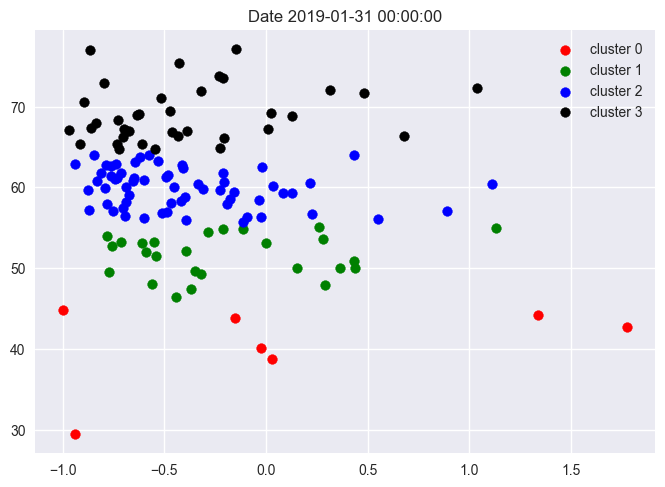

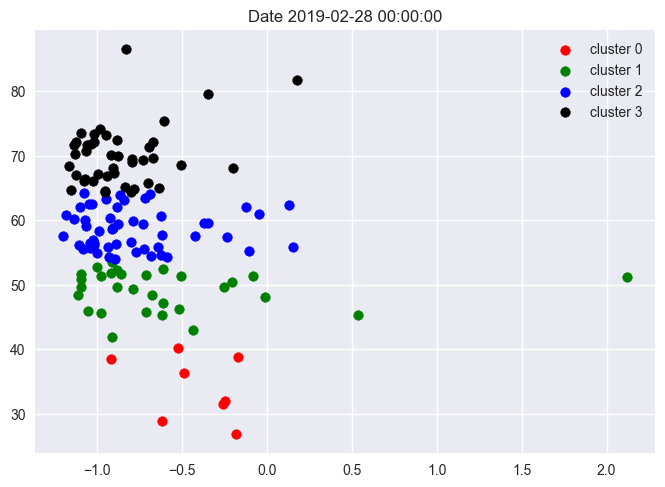

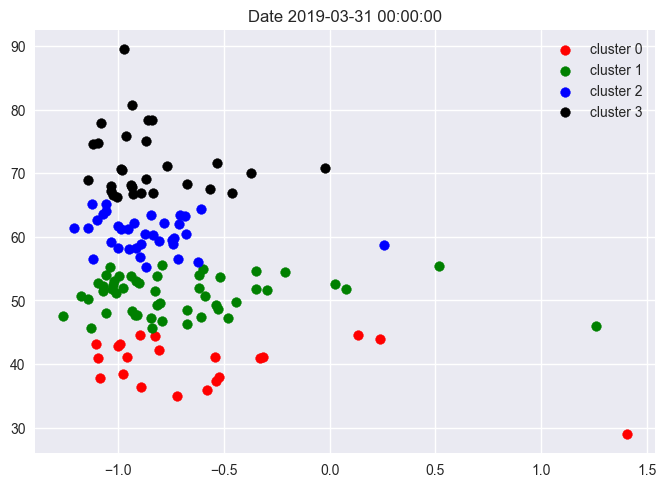

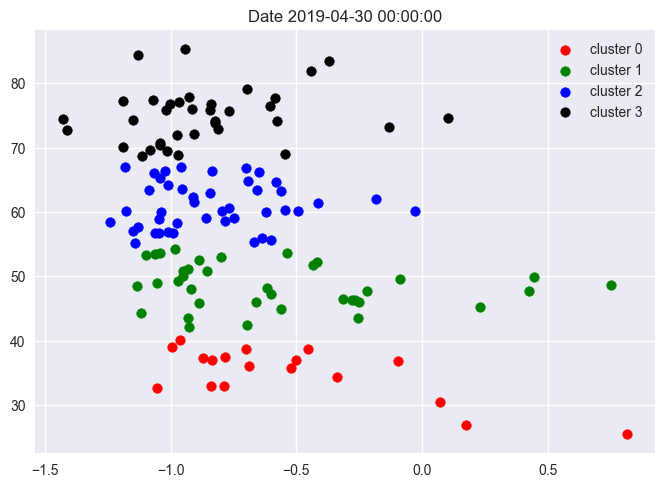

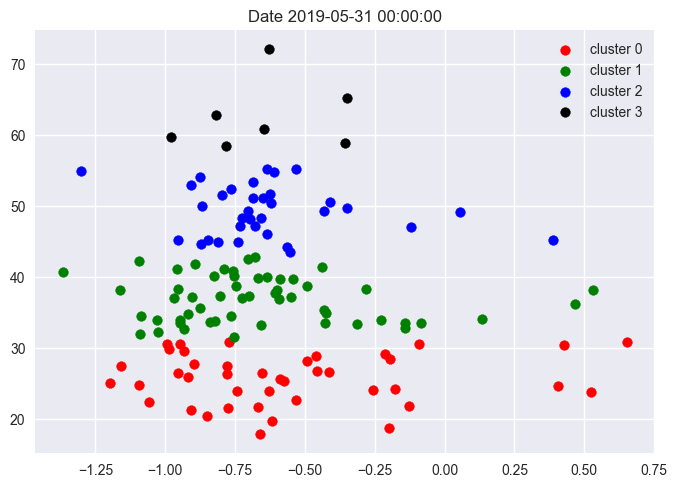

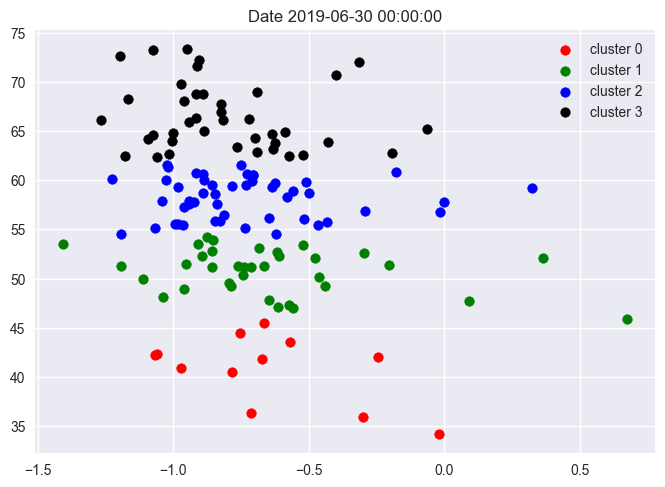

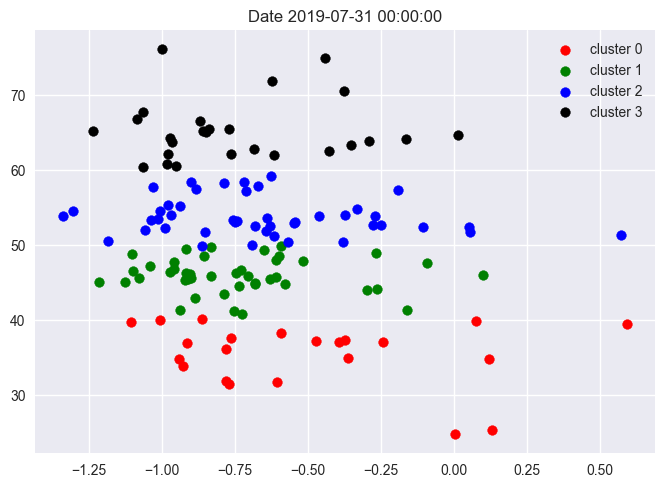

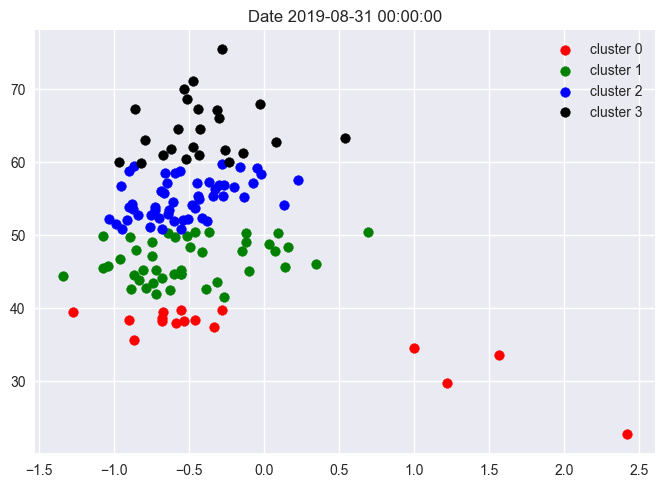

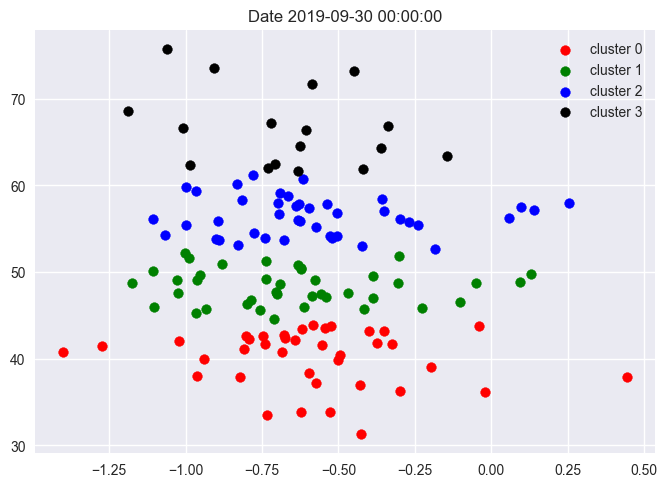

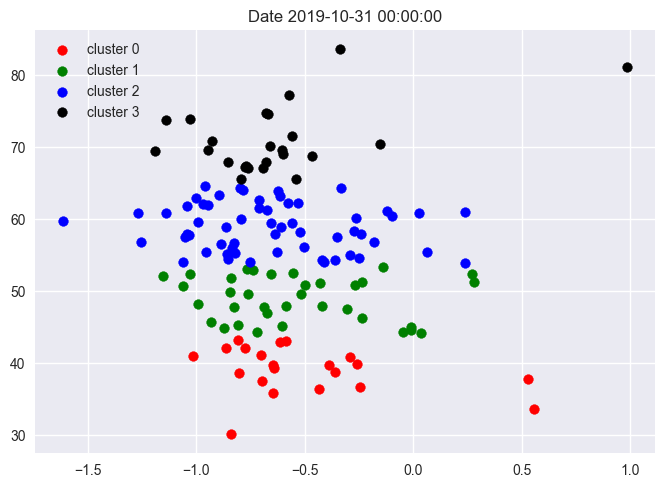

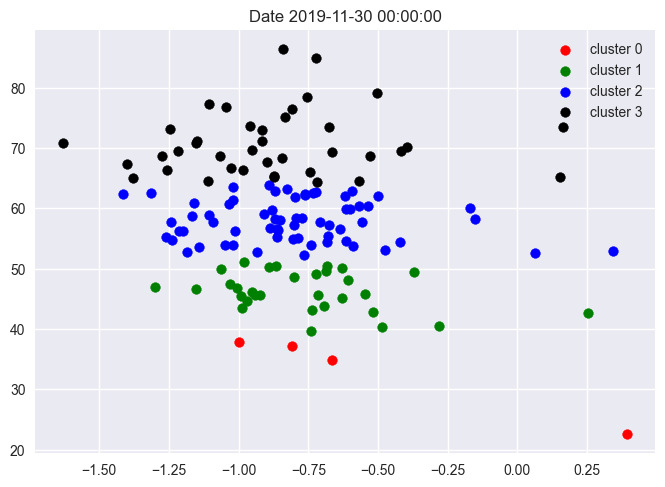

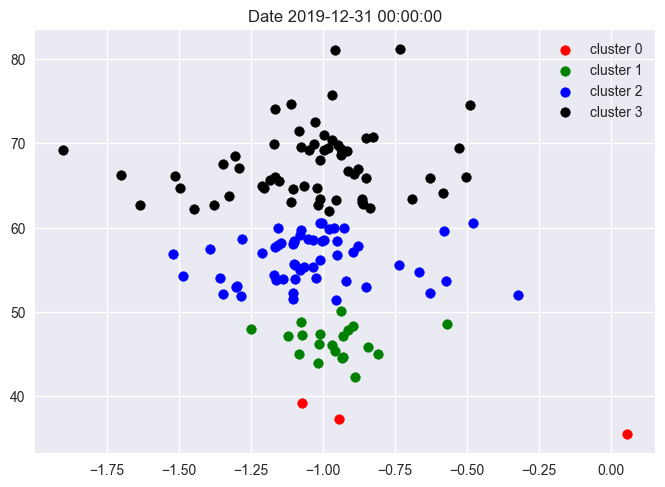

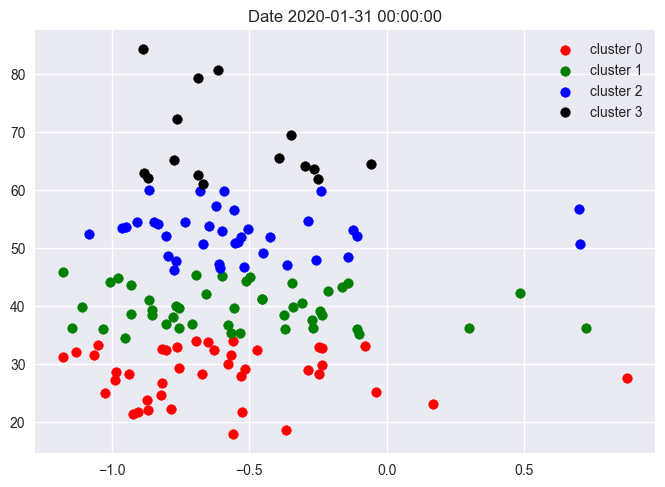

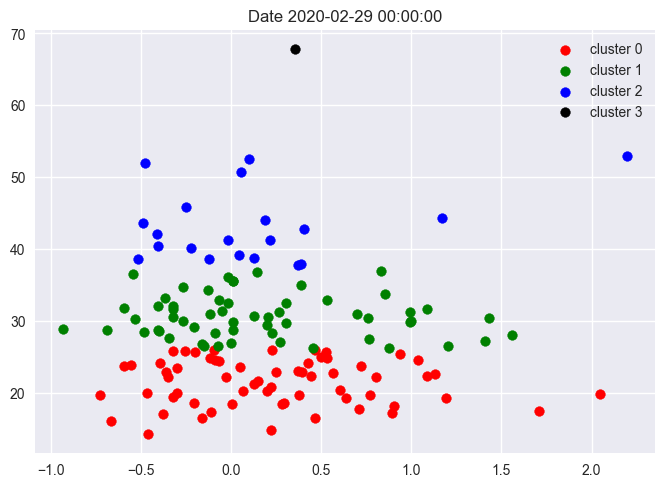

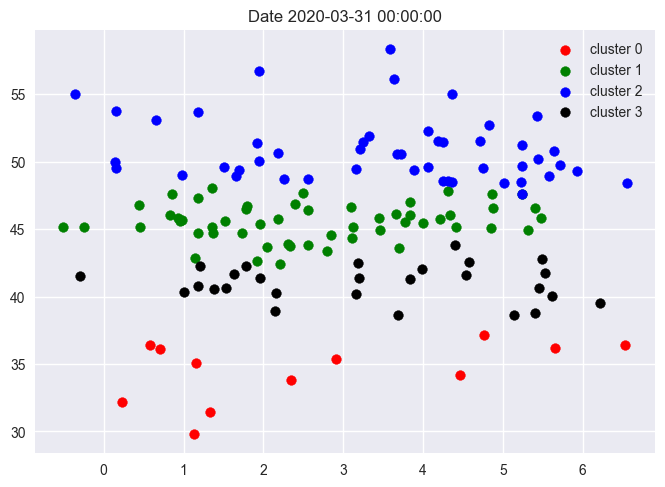

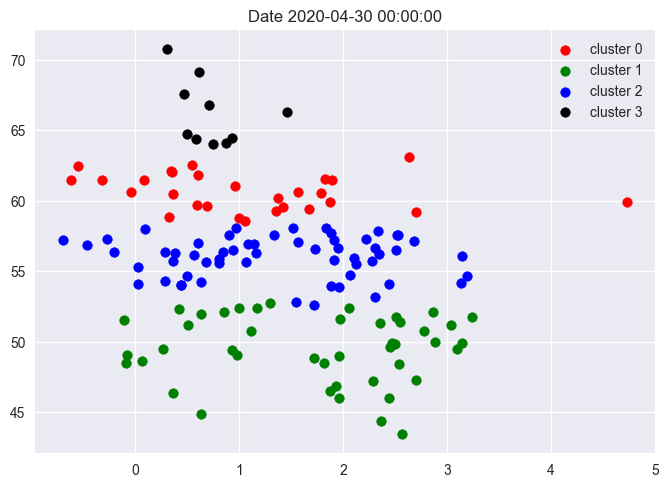

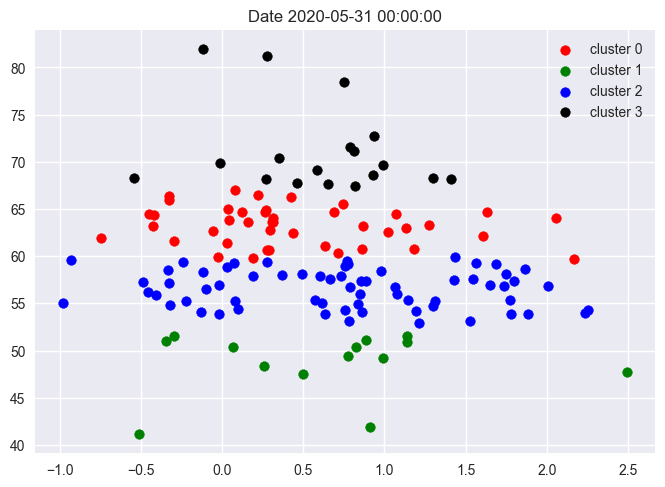

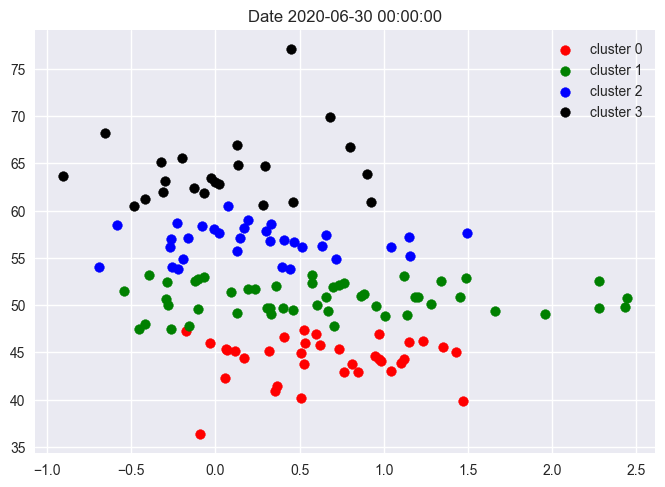

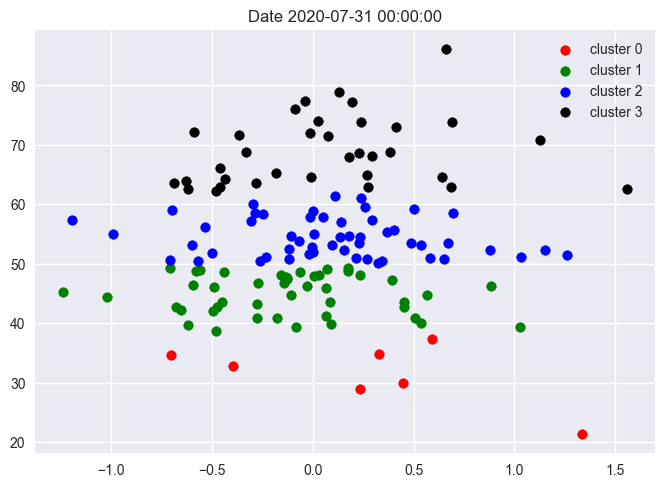

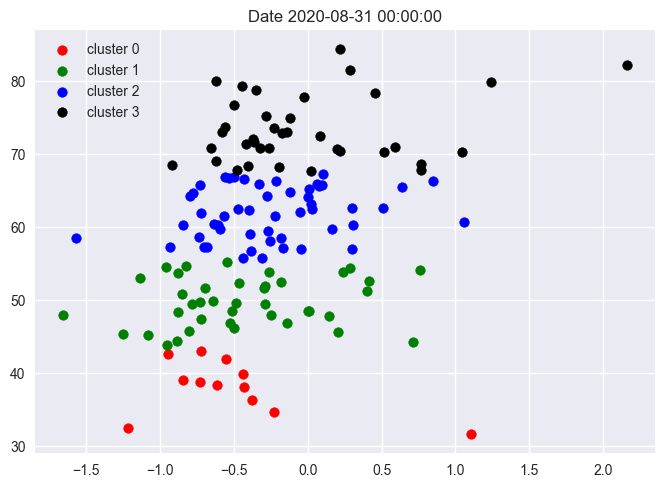

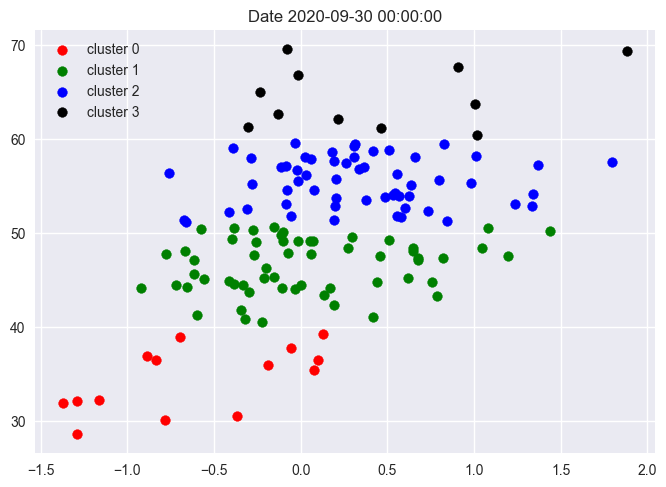

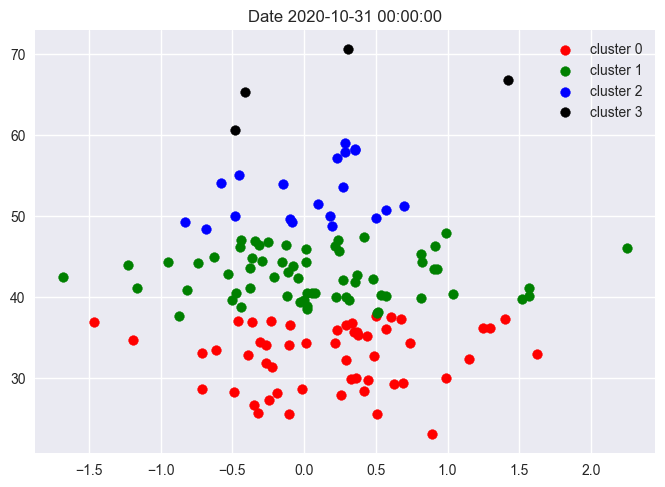

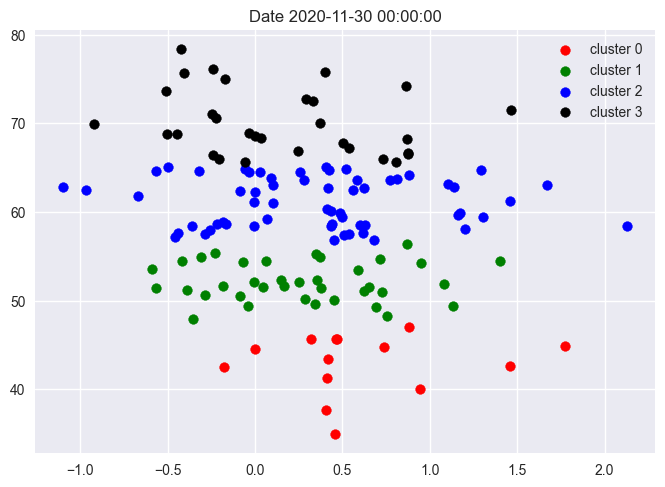

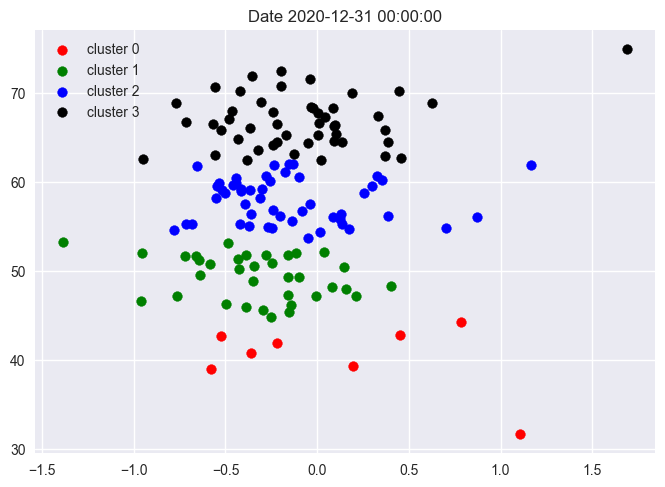

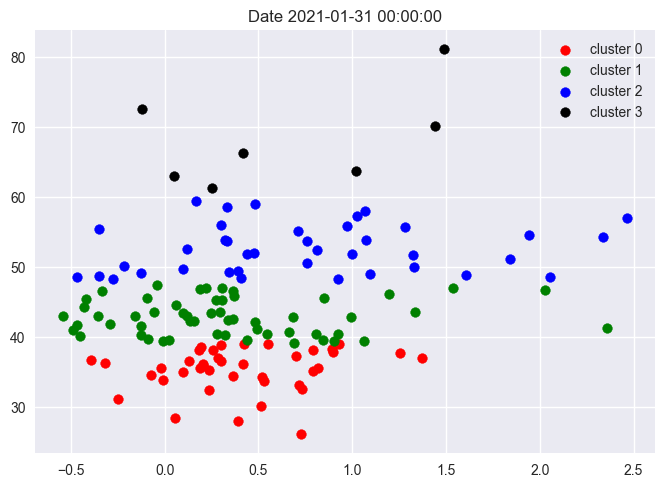

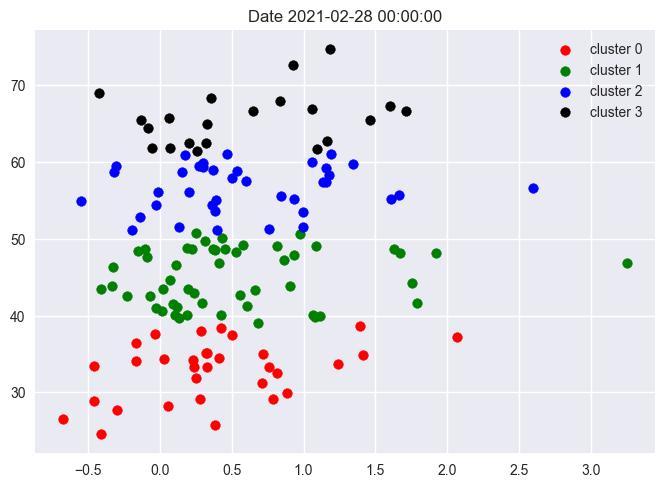

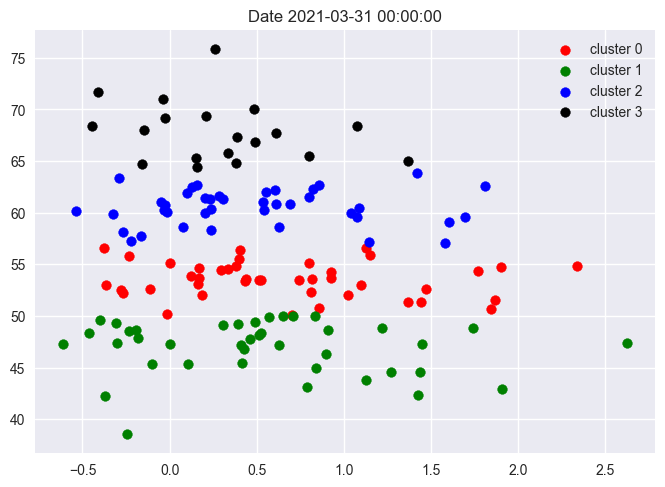

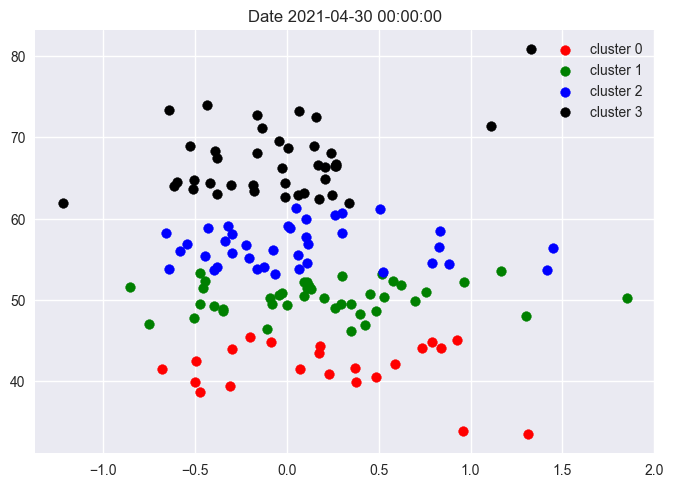

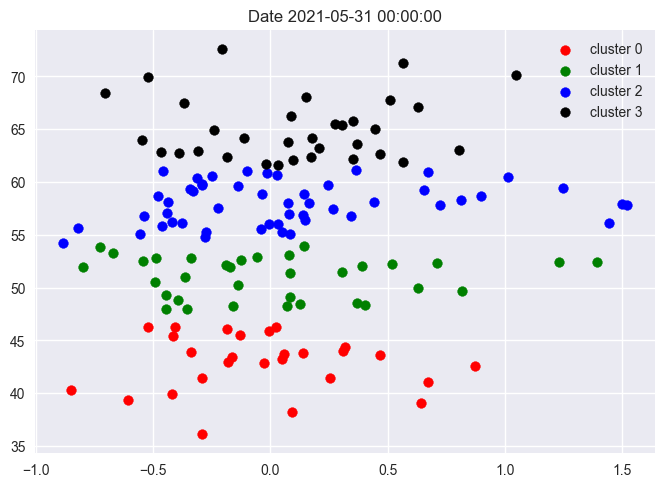

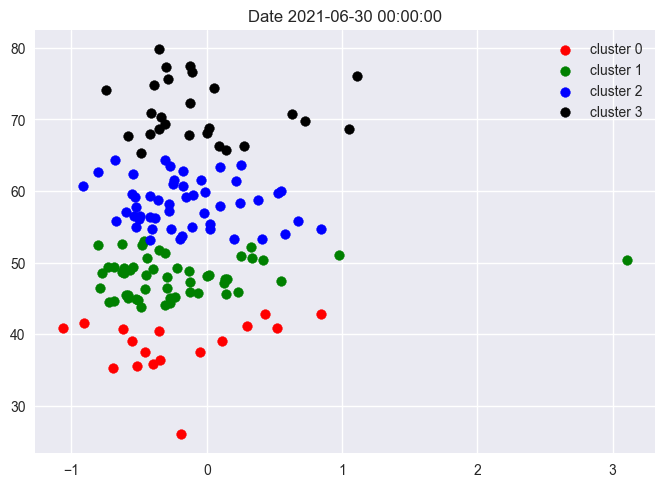

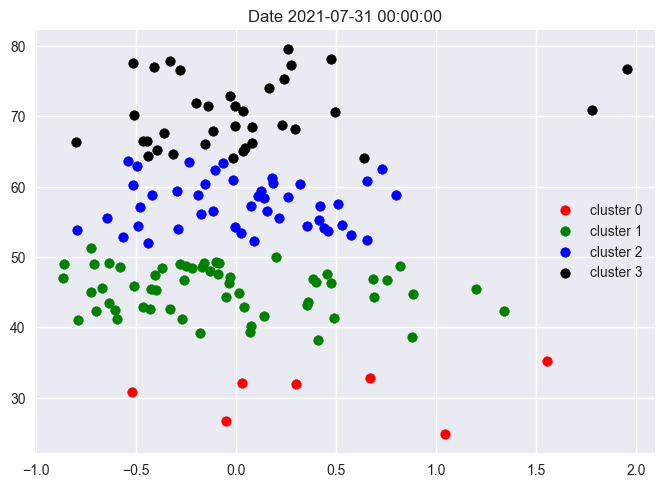

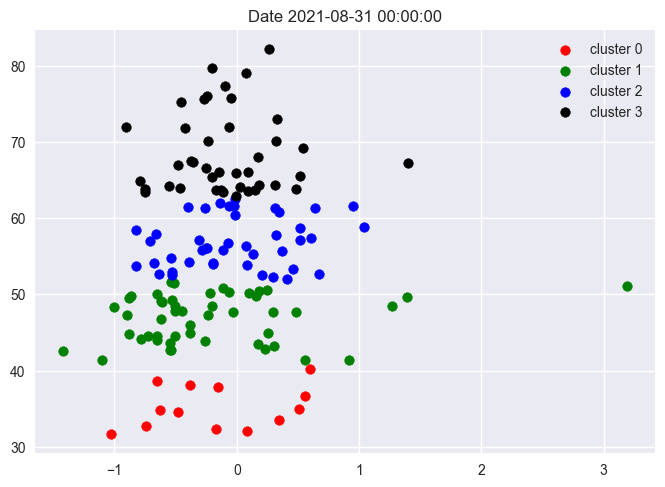

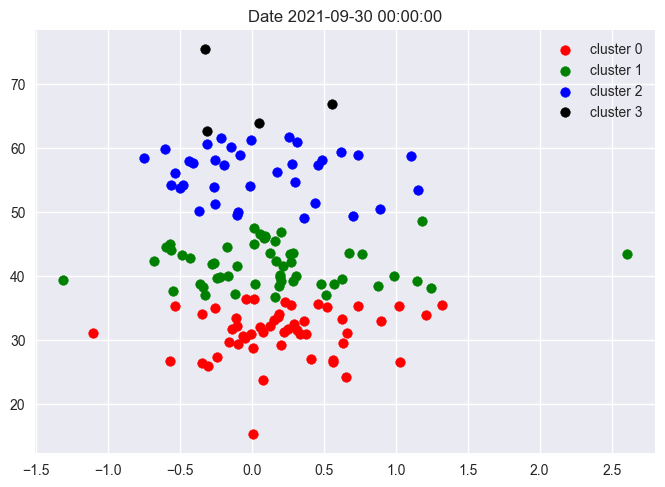

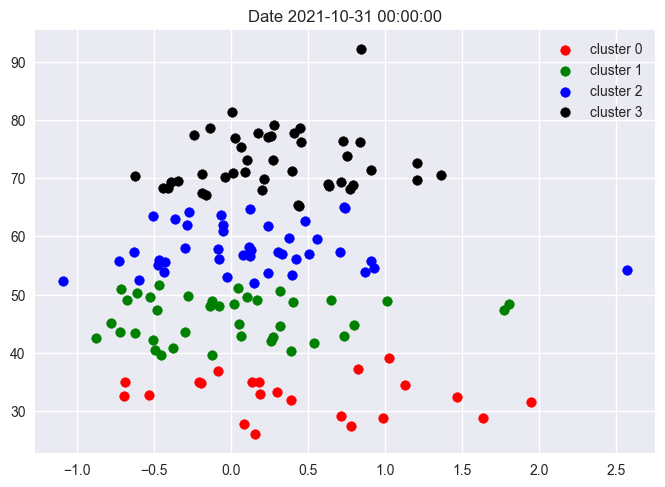

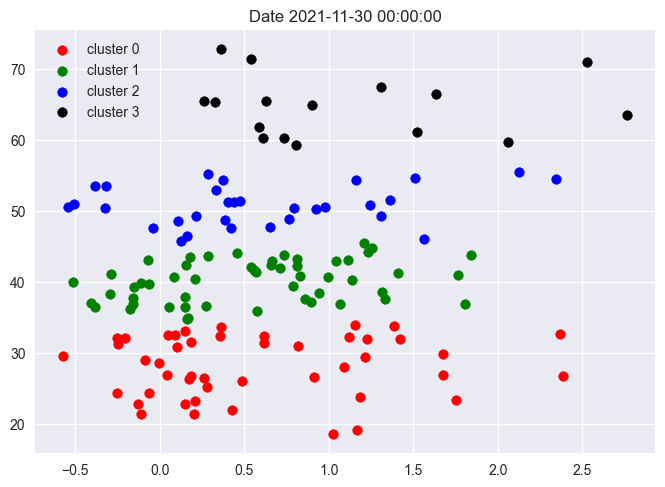

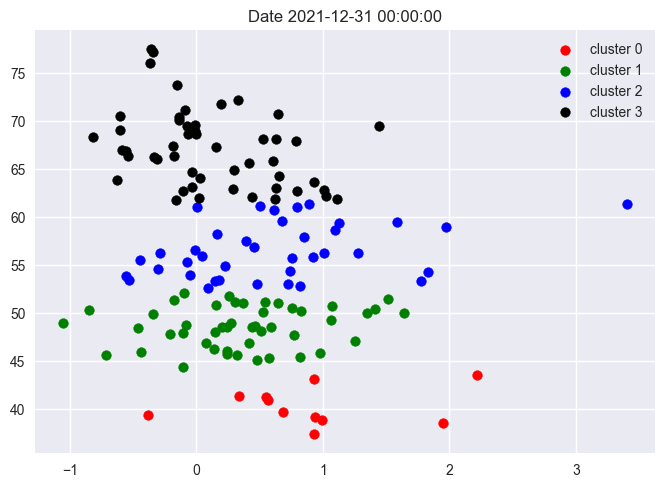

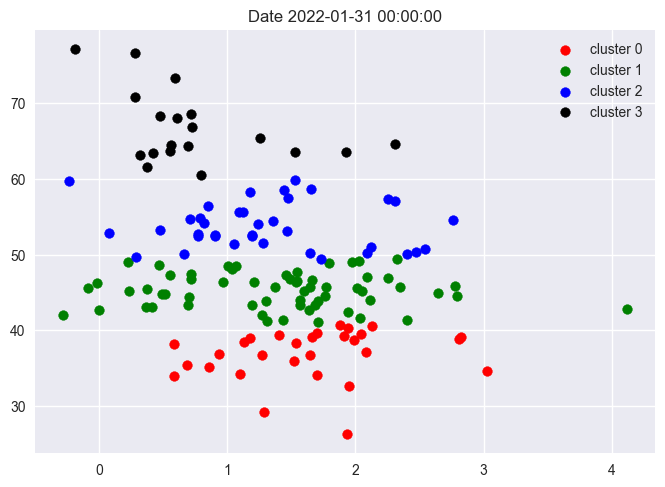

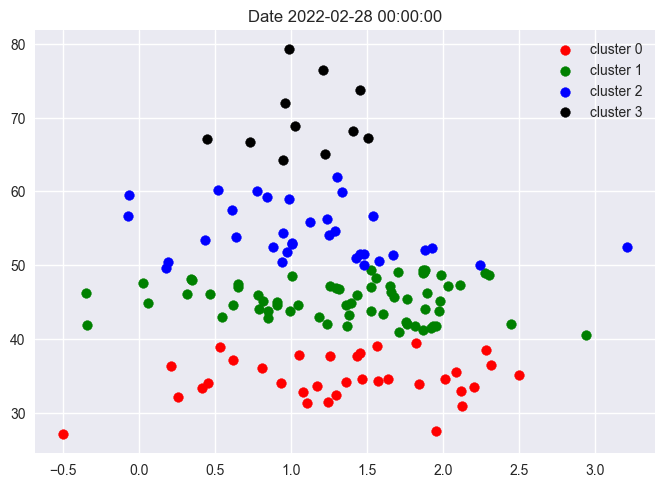

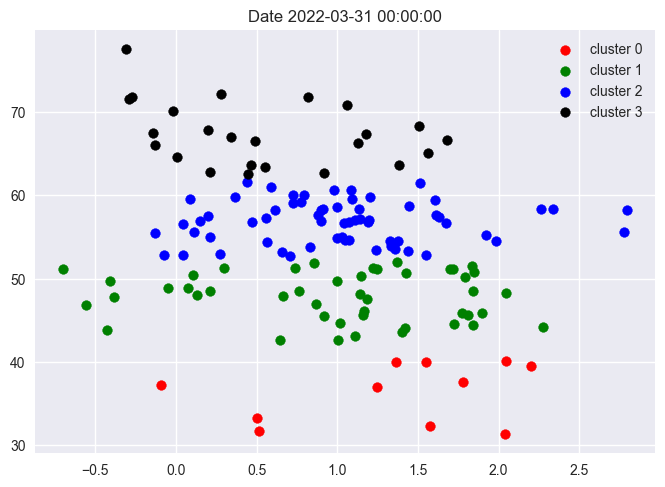

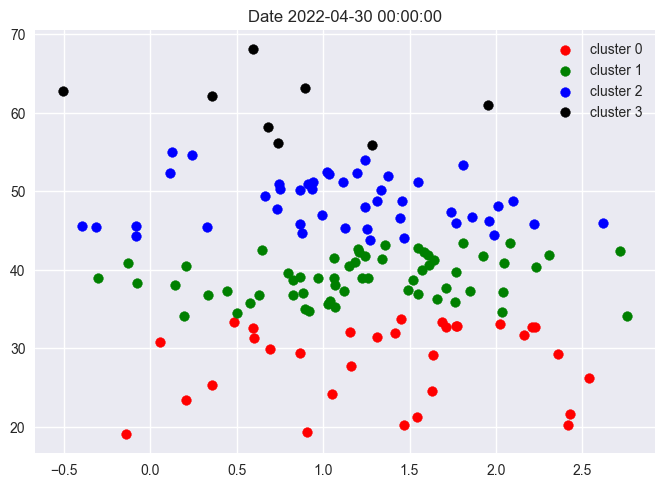

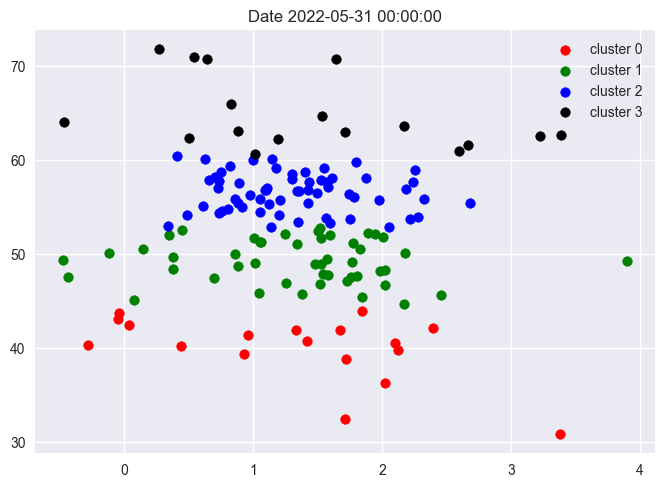

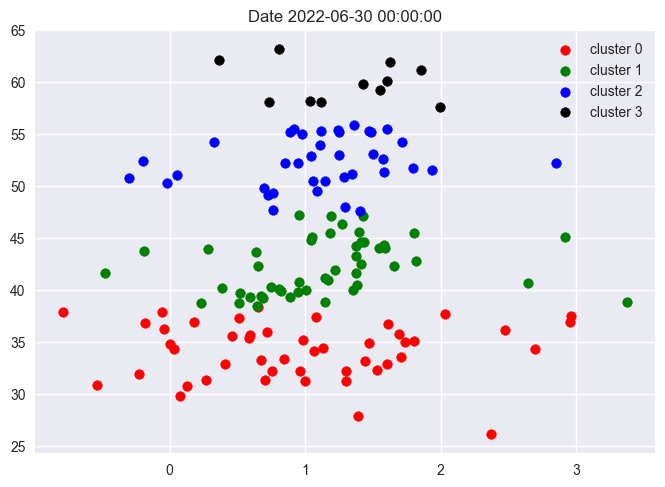

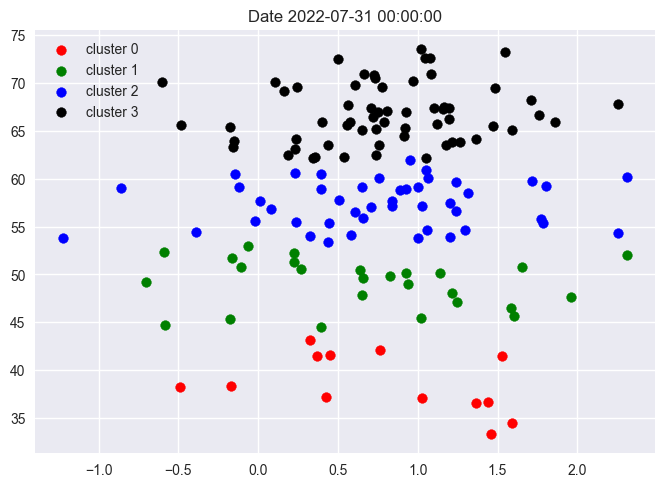

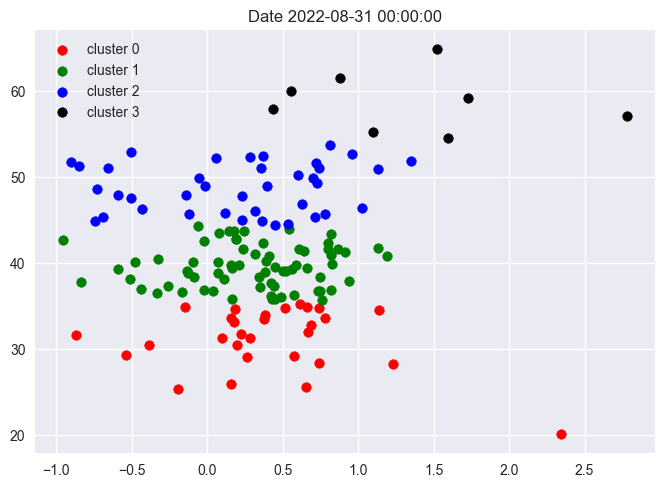

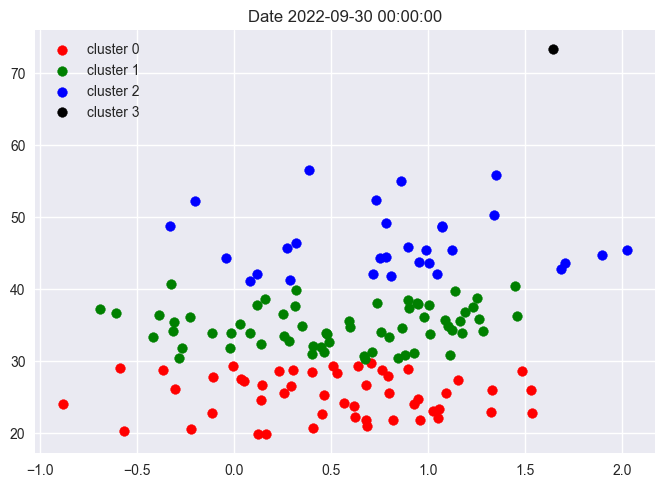

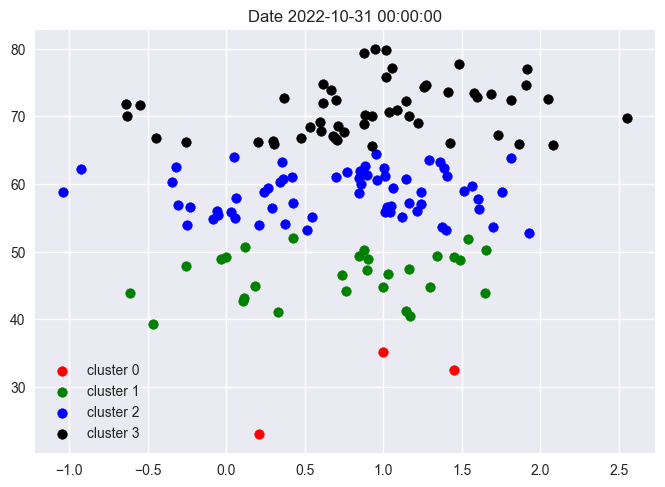

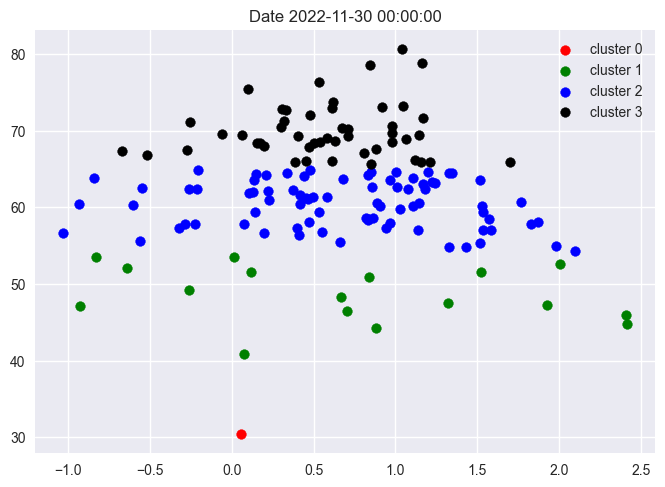

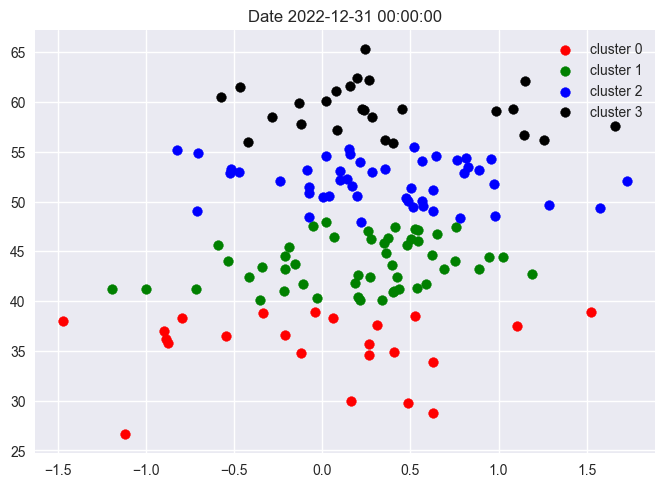

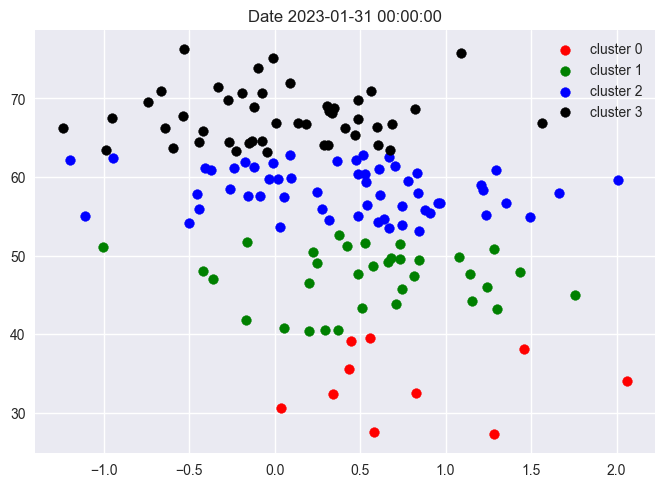

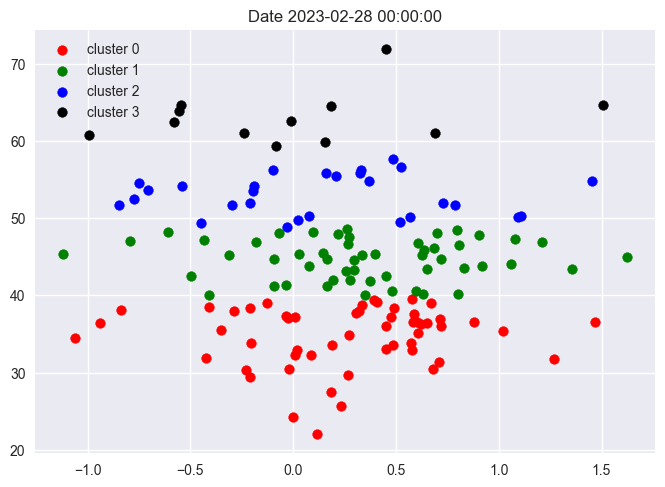

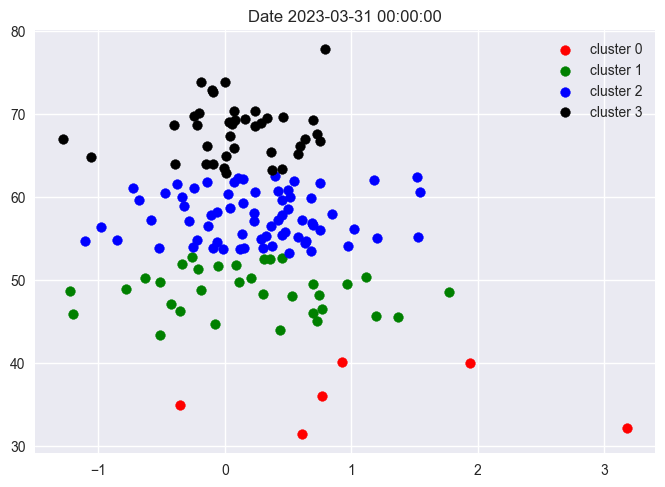

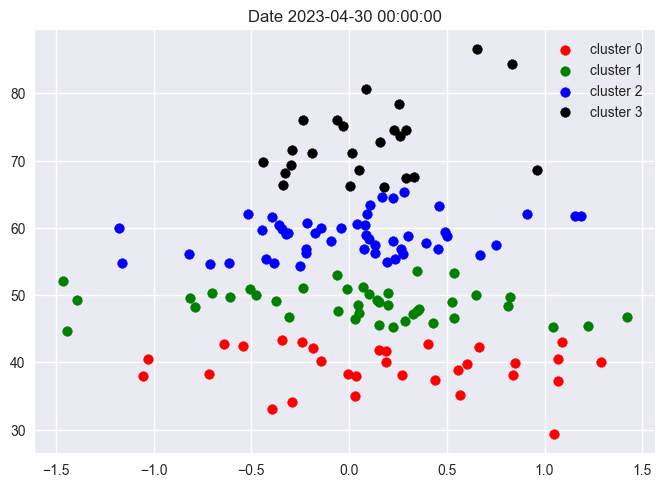

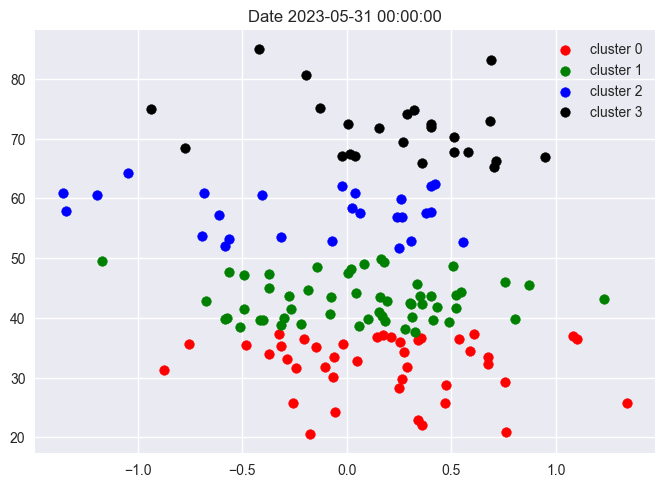

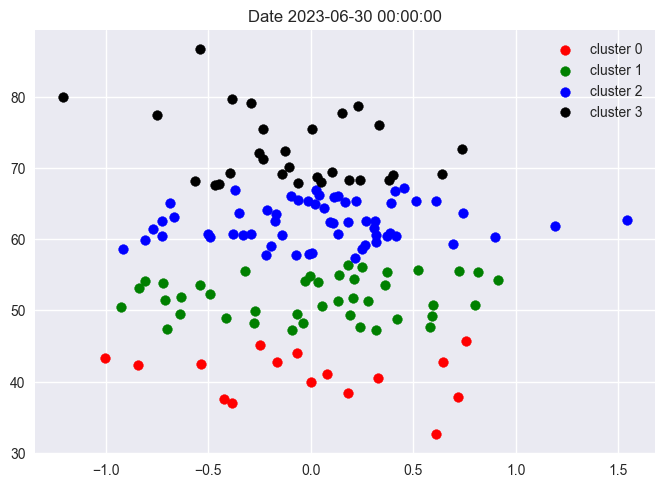

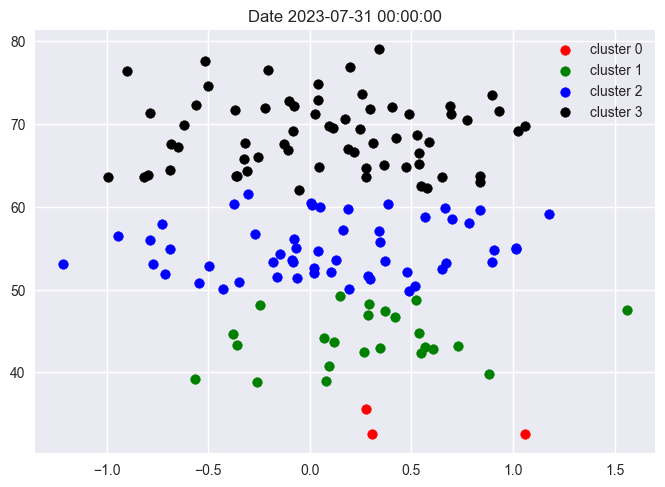

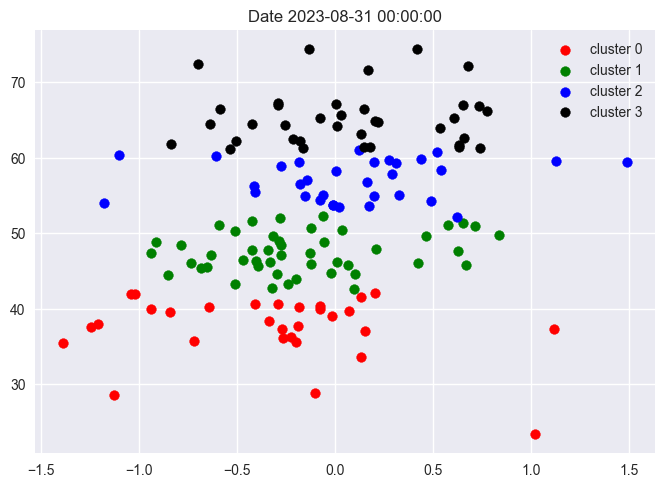

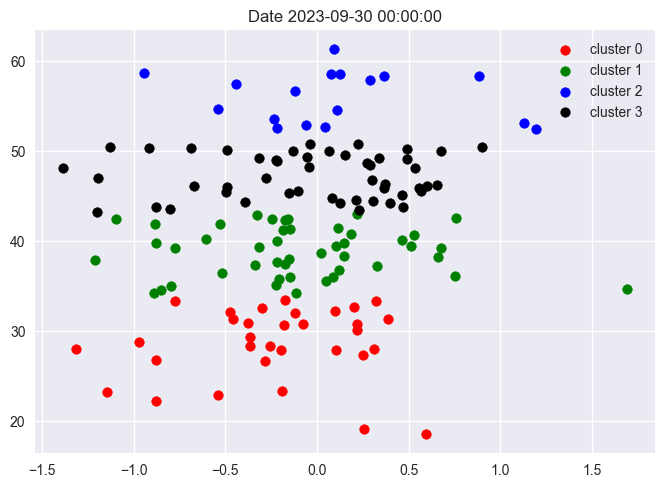

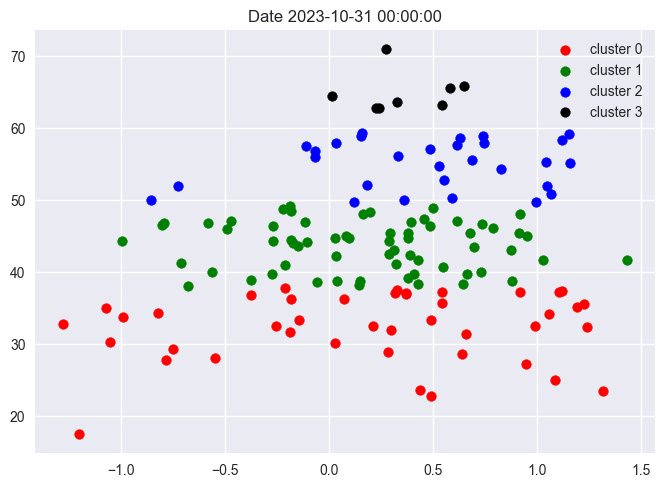

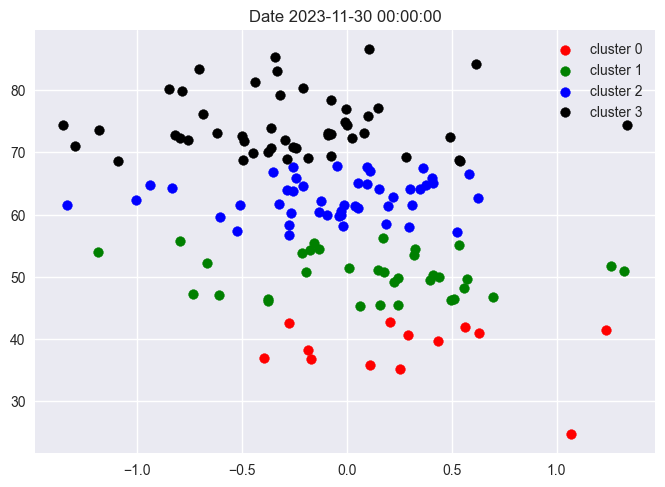

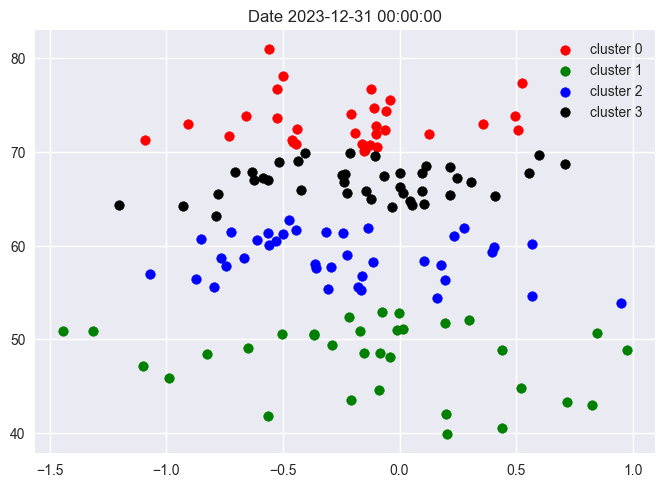

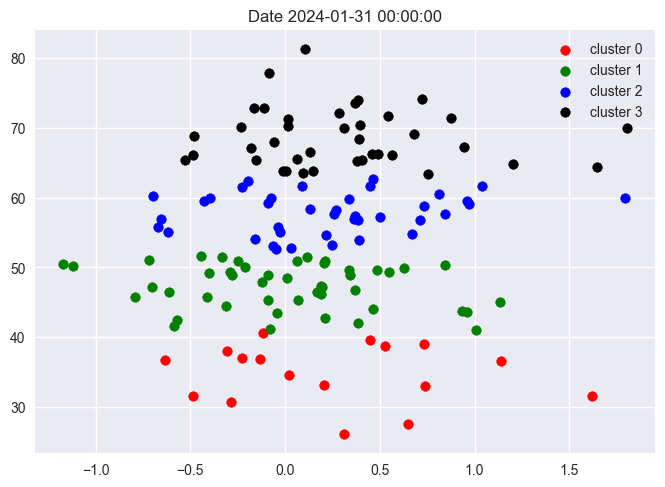

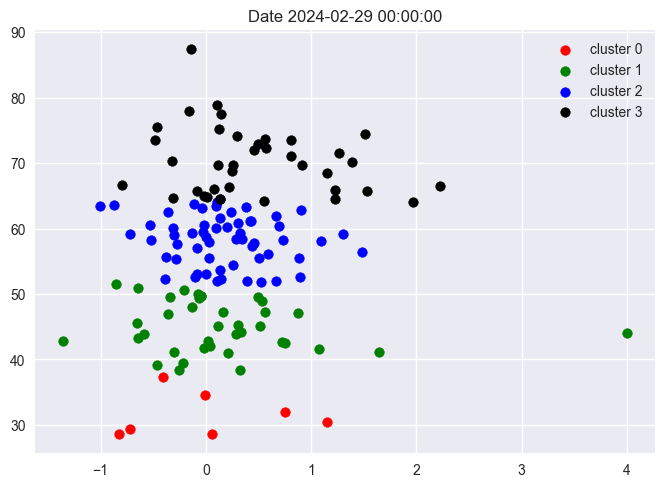

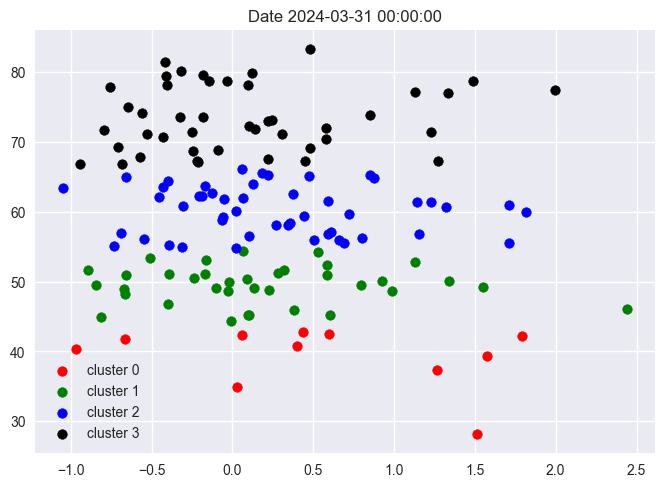

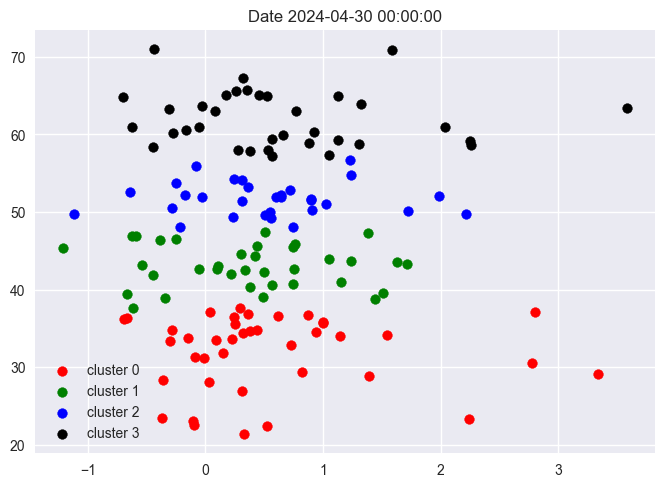

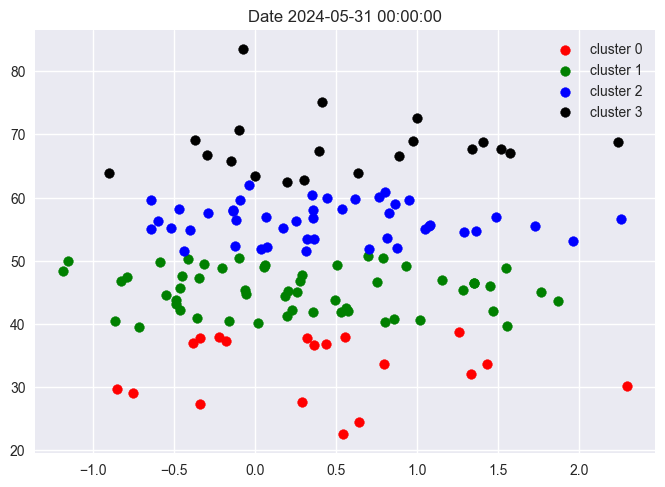

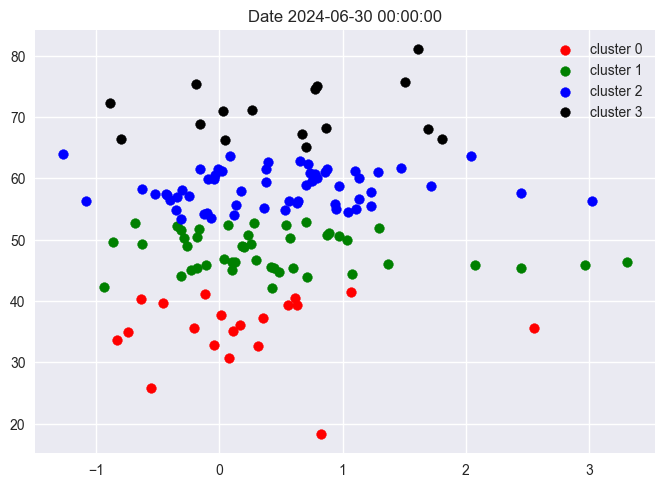

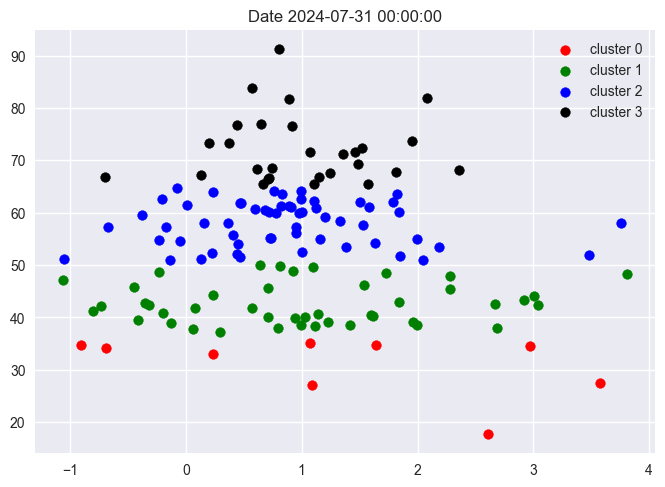

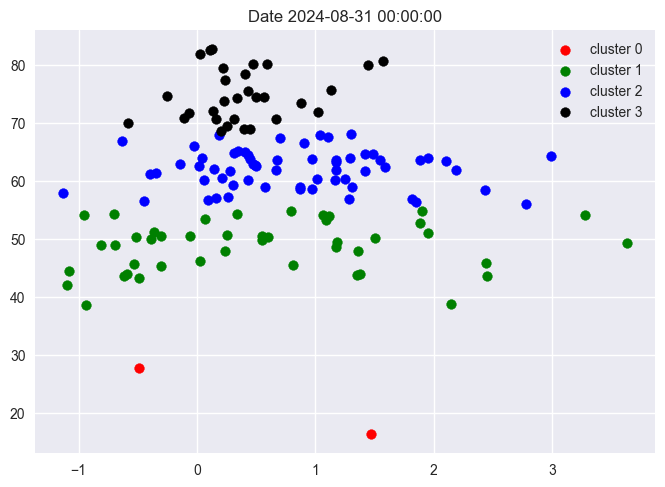

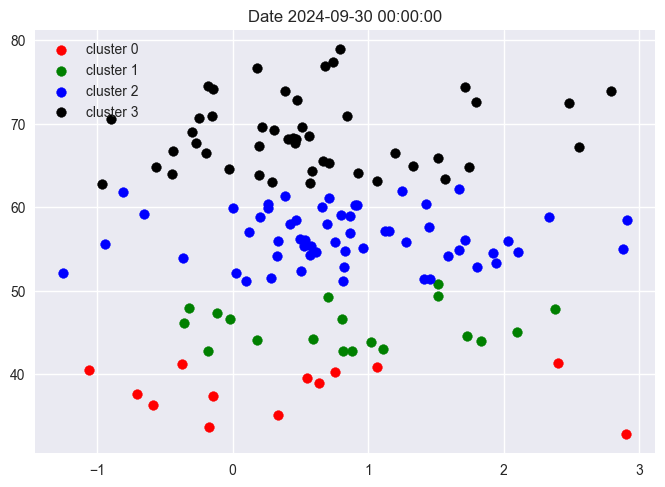

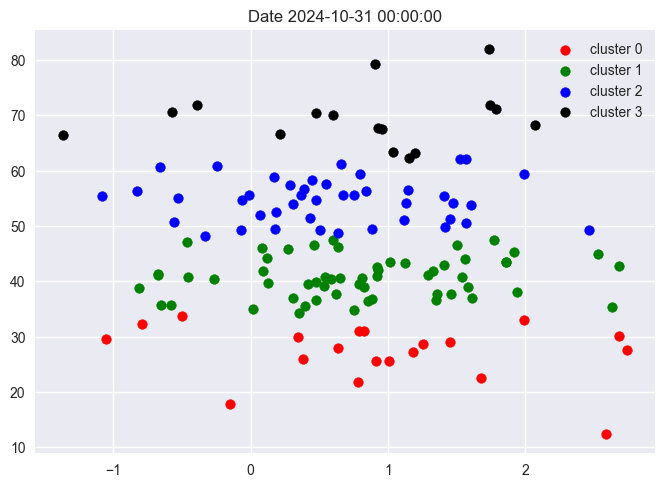

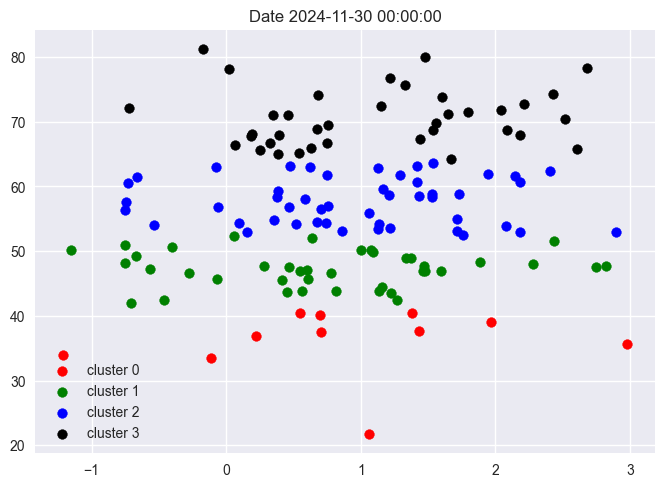

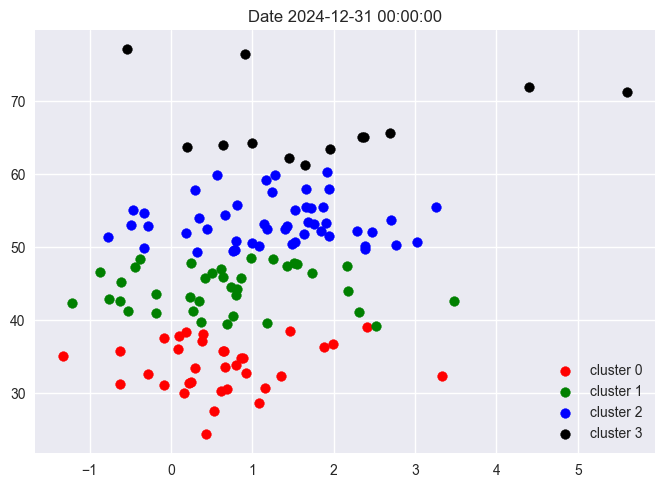

In [134]:
plt.style.use('seaborn-v0_8')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level='date')
    plt.title(f'Date {i}')
    plot_clusters(g)

In [135]:
filtered_df = data[data['cluster']==3].copy()
filtered_df

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 ADI             0.000044  69.060209  4.263873  4.503123  4.383498   
           ADSK            0.000151  64.801882  4.837477  5.000771  4.919124   
           AMD             0.003317  64.721863  2.872854  3.154208  3.013531   
           AMT             0.000253  76.964371  4.902195  5.000120  4.951157   
           BA              0.000154  72.270105  5.737754  5.939384  5.838569   
...                             ...        ...       ...       ...       ...   
2024-12-31 NFLX            0.000127  61.272228  6.781530  6.849931  6.815730   
           PLTR            0.000294  71.991918  4.169870  4.427716  4.298793   
           TSLA            0.000265  65.645587  5.790879  6.220346  6.005613   
           UAL             0.000068  63.421845  4.525375  4.630944  4.578160   
           V               0.000014  63.949686  5.726523  5.771388  5.748955   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 ADI    -0.623944  1.028703   0.151812   0.037063   0.058910   
           ADSK   -0.543499  0.521298   0.144545   0.009299   0.044301   
           AMD    -0.724728  0.089494   0.322319   0.070518   0.102603   
           AMT    -0.867946  0.586804   0.092611   0.027882   0.037075   
           BA      1.036699  1.650557   0.195721   0.054545   0.029677   
...                     ...       ...        ...        ...        ...   
2024-12-31 NFLX    1.640929  1.487407   0.042095   0.105603   0.092216   
           PLTR    4.393466  3.839448   0.224508   0.405852   0.302179   
           TSLA    2.690757  3.947360   0.315709   0.348188   0.201796   
           UAL     1.957449  1.313635   0.041723   0.135301   0.209140   
           V       0.638749  1.214451   0.018503   0.053216   0.053541   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 ADI      0.006366   0.015527    0.007805  0.795340  0.663772   
           ADSK     0.022982   0.017519    0.020327  1.415415 -0.160942   
           AMD      0.048900   0.093939    0.049055  1.868135 -1.001265   
           AMT      0.027800   0.028582    0.015028  0.755744 -0.065939   
           BA       0.014879   0.017885    0.008700  1.221494  1.467948   
...                      ...        ...         ...       ...       ...   
2024-12-31 NFLX     0.053785   0.047748    0.054856  1.273335 -0.558795   
           PLTR     0.215123   0.147142    0.135549  0.103922 -0.234527   
           TSLA     0.148497   0.111216    0.051536  0.935801  2.658860   
           UAL      0.120431   0.086317    0.077340  0.813028  0.855129   
           V        0.034744   0.016288    0.018226  0.886308 -0.122865   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-01-31 ADI     0.268938  0.501124 -0.597648        3  
           ADSK    0.424767 -0.446030 -0.957769        3  
           AMD    -0.463971 -0.272774 -0.215127        3  
           AMT    -0.363901  0.471707  0.412515        3  
           BA     -0.242893  0.701338  0.576570        3  
...                     ...       ...       ...      ...  
2024-12-31 NFLX   -0.414368 -0.999419 -1.096779        3  
           PLTR   -1.215853 -7.544201 -4.174059        3  
           TSLA   -1.106998 -0.624511 -3.418449        3  
           UAL    -0.991496 -2.507165  0.320723        3  
           V      -0.031009 -0.042342  0.263565        3  

[2044 rows x 19 columns]

In [136]:
filtered_df = filtered_df.reset_index(level=1)
filtered_df

,ticker,garman_klass_vol,rsi,bb_low,bb_high,bb_mid,atr,macd,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2019-01-31,ADI,0.000044,69.060209,4.263873,4.503123,4.383498,-0.623944,1.028703,0.151812,0.037063,0.058910,0.006366,0.015527,0.007805,0.795340,0.663772,0.268938,0.501124,-0.597648,3
2019-01-31,ADSK,0.000151,64.801882,4.837477,5.000771,4.919124,-0.543499,0.521298,0.144545,0.009299,0.044301,0.022982,0.017519,0.020327,1.415415,-0.160942,0.424767,-0.446030,-0.957769,3
2019-01-31,AMD,0.003317,64.721863,2.872854,3.154208,3.013531,-0.724728,0.089494,0.322319,0.070518,0.102603,0.048900,0.093939,0.049055,1.868135,-1.001265,-0.463971,-0.272774,-0.215127,3
2019-01-31,AMT,0.000253,76.964371,4.902195,5.000120,4.951157,-0.867946,0.586804,0.092611,0.027882,0.037075,0.027800,0.028582,0.015028,0.755744,-0.065939,-0.363901,0.471707,0.412515,3
2019-01-31,BA,0.000154,72.270105,5.737754,5.939384,5.838569,1.036699,1.650557,0.195721,0.054545,0.029677,0.014879,0.017885,0.008700,1.221494,1.467948,-0.242893,0.701338,0.576570,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,NFLX,0.000127,61.272228,6.781530,6.849931,6.815730,1.640929,1.487407,0.042095,0.105603,0.092216,0.053785,0.047748,0.054856,1.273335,-0.558795,-0.414368,-0.999419,-1.096779,3
2024-12-31,PLTR,0.000294,71.991918,4.169870,4.427716,4.298793,4.393466,3.839448,0.224508,0.405852,0.302179,0.215123,0.147142,0.135549,0.103922,-0.234527,-1.215853,-7.544201,-4.174059,3
2024-12-31,TSLA,0.000265,65.645587,5.790879,6.220346,6.005613,2.690757,3.947360,0.315709,0.348188,0.201796,0.148497,0.111216,0.051536,0.935801,2.658860,-1.106998,-0.624511,-3.418449,3


In [137]:
filtered_df.index = filtered_df.index+pd.DateOffset(1)
filtered_df

,ticker,garman_klass_vol,rsi,bb_low,bb_high,bb_mid,atr,macd,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m,Mkt-RF,SMB,HML,RMW,CMA,cluster
date,,,,,,,,,,,,,,,,,,,,
2019-02-01,ADI,0.000044,69.060209,4.263873,4.503123,4.383498,-0.623944,1.028703,0.151812,0.037063,0.058910,0.006366,0.015527,0.007805,0.795340,0.663772,0.268938,0.501124,-0.597648,3
2019-02-01,ADSK,0.000151,64.801882,4.837477,5.000771,4.919124,-0.543499,0.521298,0.144545,0.009299,0.044301,0.022982,0.017519,0.020327,1.415415,-0.160942,0.424767,-0.446030,-0.957769,3
2019-02-01,AMD,0.003317,64.721863,2.872854,3.154208,3.013531,-0.724728,0.089494,0.322319,0.070518,0.102603,0.048900,0.093939,0.049055,1.868135,-1.001265,-0.463971,-0.272774,-0.215127,3
2019-02-01,AMT,0.000253,76.964371,4.902195,5.000120,4.951157,-0.867946,0.586804,0.092611,0.027882,0.037075,0.027800,0.028582,0.015028,0.755744,-0.065939,-0.363901,0.471707,0.412515,3
2019-02-01,BA,0.000154,72.270105,5.737754,5.939384,5.838569,1.036699,1.650557,0.195721,0.054545,0.029677,0.014879,0.017885,0.008700,1.221494,1.467948,-0.242893,0.701338,0.576570,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01,NFLX,0.000127,61.272228,6.781530,6.849931,6.815730,1.640929,1.487407,0.042095,0.105603,0.092216,0.053785,0.047748,0.054856,1.273335,-0.558795,-0.414368,-0.999419,-1.096779,3
2025-01-01,PLTR,0.000294,71.991918,4.169870,4.427716,4.298793,4.393466,3.839448,0.224508,0.405852,0.302179,0.215123,0.147142,0.135549,0.103922,-0.234527,-1.215853,-7.544201,-4.174059,3
2025-01-01,TSLA,0.000265,65.645587,5.790879,6.220346,6.005613,2.690757,3.947360,0.315709,0.348188,0.201796,0.148497,0.111216,0.051536,0.935801,2.658860,-1.106998,-0.624511,-3.418449,3


In [138]:
filtered_df = filtered_df.reset_index().set_index(['date','ticker'])
filtered_df

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-02-01 ADI             0.000044  69.060209  4.263873  4.503123  4.383498   
           ADSK            0.000151  64.801882  4.837477  5.000771  4.919124   
           AMD             0.003317  64.721863  2.872854  3.154208  3.013531   
           AMT             0.000253  76.964371  4.902195  5.000120  4.951157   
           BA              0.000154  72.270105  5.737754  5.939384  5.838569   
...                             ...        ...       ...       ...       ...   
2025-01-01 NFLX            0.000127  61.272228  6.781530  6.849931  6.815730   
           PLTR            0.000294  71.991918  4.169870  4.427716  4.298793   
           TSLA            0.000265  65.645587  5.790879  6.220346  6.005613   
           UAL             0.000068  63.421845  4.525375  4.630944  4.578160   
           V               0.000014  63.949686  5.726523  5.771388  5.748955   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-02-01 ADI    -0.623944  1.028703   0.151812   0.037063   0.058910   
           ADSK   -0.543499  0.521298   0.144545   0.009299   0.044301   
           AMD    -0.724728  0.089494   0.322319   0.070518   0.102603   
           AMT    -0.867946  0.586804   0.092611   0.027882   0.037075   
           BA      1.036699  1.650557   0.195721   0.054545   0.029677   
...                     ...       ...        ...        ...        ...   
2025-01-01 NFLX    1.640929  1.487407   0.042095   0.105603   0.092216   
           PLTR    4.393466  3.839448   0.224508   0.405852   0.302179   
           TSLA    2.690757  3.947360   0.315709   0.348188   0.201796   
           UAL     1.957449  1.313635   0.041723   0.135301   0.209140   
           V       0.638749  1.214451   0.018503   0.053216   0.053541   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-02-01 ADI      0.006366   0.015527    0.007805  0.795340  0.663772   
           ADSK     0.022982   0.017519    0.020327  1.415415 -0.160942   
           AMD      0.048900   0.093939    0.049055  1.868135 -1.001265   
           AMT      0.027800   0.028582    0.015028  0.755744 -0.065939   
           BA       0.014879   0.017885    0.008700  1.221494  1.467948   
...                      ...        ...         ...       ...       ...   
2025-01-01 NFLX     0.053785   0.047748    0.054856  1.273335 -0.558795   
           PLTR     0.215123   0.147142    0.135549  0.103922 -0.234527   
           TSLA     0.148497   0.111216    0.051536  0.935801  2.658860   
           UAL      0.120431   0.086317    0.077340  0.813028  0.855129   
           V        0.034744   0.016288    0.018226  0.886308 -0.122865   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-02-01 ADI     0.268938  0.501124 -0.597648        3  
           ADSK    0.424767 -0.446030 -0.957769        3  
           AMD    -0.463971 -0.272774 -0.215127        3  
           AMT    -0.363901  0.471707  0.412515        3  
           BA     -0.242893  0.701338  0.576570        3  
...                     ...       ...       ...      ...  
2025-01-01 NFLX   -0.414368 -0.999419 -1.096779        3  
           PLTR   -1.215853 -7.544201 -4.174059        3  
           TSLA   -1.106998 -0.624511 -3.418449        3  
           UAL    -0.991496 -2.507165  0.320723        3  
           V      -0.031009 -0.042342  0.263565        3  

[2044 rows x 19 columns]

In [140]:
dates = filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level='date').index.tolist()



fixed_dates

{'2019-02-01': ['ADI',
  'ADSK',
  'AMD',
  'AMT',
  'BA',
  'BDX',
  'C',
  'CHTR',
  'CMG',
  'CSCO',
  'DHR',
  'EBAY',
  'ELV',
  'GE',
  'GM',
  'HUM',
  'IBM',
  'LRCX',
  'LUV',
  'MA',
  'MCK',
  'MDLZ',
  'META',
  'MGM',
  'NKE',
  'NXPI',
  'ORCL',
  'PANW',
  'PG',
  'REGN',
  'SBUX',
  'SHW',
  'TJX',
  'UNH',
  'USB',
  'VLO',
  'WYNN'],
 '2019-03-01': ['ABT',
  'ACN',
  'ADBE',
  'ADI',
  'ADP',
  'ADSK',
  'AXP',
  'AZO',
  'BA',
  'BLK',
  'CHTR',
  'CMG',
  'CRM',
  'CSCO',
  'CSX',
  'DHR',
  'EBAY',
  'HON',
  'IBM',
  'INTC',
  'INTU',
  'JNJ',
  'LLY',
  'LMT',
  'MA',
  'MAR',
  'MCD',
  'MO',
  'MRK',
  'MSFT',
  'NEE',
  'NKE',
  'NOC',
  'ORCL',
  'PANW',
  'PM',
  'PYPL',
  'TJX',
  'TMO',
  'ULTA',
  'UNP',
  'V',
  'XOM'],
 '2019-04-01': ['ACN',
  'ADP',
  'ALGN',
  'AMT',
  'AVGO',
  'AZO',
  'CMG',
  'COST',
  'CSCO',
  'DHR',
  'DLTR',
  'HD',
  'HON',
  'INTU',
  'LOW',
  'MA',
  'MCD',
  'MDLZ',
  'MO',
  'MRK',
  'PEP',
  'PG',
  'PYPL',
  'SBUX',
  '

In [141]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [167]:
def optimised_weights(prices, lower_bound=0):
    returns = expected_returns.mean_historical_return(prices= prices, frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)
    ef = EfficientFrontier(returns, cov, weight_bounds=(lower_bound,0.1), solver='SCS')
    weights = ef.max_sharpe()
    return ef.clean_weights()

In [145]:
data

garman_klass_vol        rsi    bb_low   bb_high    bb_mid  \
date       ticker                                                              
2019-01-31 AAPL            0.000353  59.720392  3.534849  3.671016  3.602932   
           ABBV            0.000419  40.109127  4.082569  4.271188  4.176879   
           ABT             0.000151  59.373378  4.094057  4.186332  4.140195   
           ACN             0.000067  59.922296  4.847532  4.969386  4.908459   
           ADBE            0.000148  59.029843  5.407720  5.540962  5.474341   
...                             ...        ...       ...       ...       ...   
2024-12-31 VZ              0.000054  30.995508  3.642895  3.787300  3.715098   
           WDAY            0.000102  52.492458  5.524290  5.653111  5.588700   
           WFC             0.000044  52.166673  4.214361  4.336487  4.275424   
           WMT             0.000027  55.432317  4.510158  4.566291  4.538224   
           XOM             0.000052  24.296816  4.625304  4.781075  4.703189   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2019-01-31 AAPL   -0.874851 -0.381170   0.055154  -0.034589  -0.086165   
           ABBV   -0.023677 -1.043383  -0.118400  -0.071480   0.014454   
           ABT    -0.159586  0.139833   0.013665  -0.004952   0.020737   
           ACN    -0.792167  0.043043   0.088930  -0.033915  -0.008682   
           ADBE   -0.672298  0.203190   0.095385  -0.006137   0.002786   
...                     ...       ...        ...        ...        ...   
2024-12-31 VZ     -0.080580 -1.566519  -0.098782  -0.026094  -0.033200   
           WDAY    1.396000  0.515571   0.077563   0.073282   0.032957   
           WFC     1.848731 -0.202204  -0.057897   0.054386   0.085097   
           WMT     3.256346  1.711857   0.005358   0.065263   0.048190   
           XOM     0.426663 -2.685966  -0.097236  -0.041158  -0.028848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2019-01-31 AAPL    -0.020933   0.001996    0.000748  1.283557 -0.197436   
           ABBV    -0.019116  -0.016684   -0.024001  0.538861  0.268728   
           ABT      0.019565   0.027107    0.014985  0.770663 -0.038252   
           ACN     -0.004631   0.002728   -0.002300  1.191128 -0.207883   
           ADBE     0.002128   0.012503    0.018128  1.320482 -0.574843   
...                      ...        ...         ...       ...       ...   
2024-12-31 VZ       0.000032  -0.000117    0.010280  0.885510 -0.607195   
           WDAY     0.031562  -0.001380   -0.002039  0.760261 -1.023756   
           WFC      0.034336   0.026188    0.034164  0.723369 -0.312742   
           WMT      0.054810   0.050300    0.049563  0.844683  0.175307   
           XOM     -0.010234  -0.007010    0.008084  0.614502  0.031073   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2019-01-31 AAPL   -0.638360  0.339817  0.453543        2  
           ABBV   -0.126493  0.377313  0.530364        0  
           ABT    -0.439063  0.135734  1.030660        2  
           ACN    -0.217047  0.321532 -0.015812        2  
           ADBE   -0.252454  0.311418 -0.424427        2  
...                     ...       ...       ...      ...  
2024-12-31 VZ      0.299290  0.505134  0.276425        0  
           WDAY    0.151963 -2.488470 -0.729054        2  
           WFC     1.430125 -2.012817 -1.095359        2  
           WMT    -0.332489  1.278244  0.295491        2  
           XOM     0.205460  1.178936  0.728172        0  

[10193 rows x 19 columns]

In [146]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0] - pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

[*********************100%***********************]  155 of 155 completed


In [147]:
new_df

Price            Close                                                  \
Ticker            AAPL        ABBV        ABNB         ABT         ACN   
Date                                                                     
2018-01-31   39.344807   82.313705         NaN   55.006340  144.842728   
2018-02-01   39.427071   85.335732         NaN   55.024036  144.626389   
2018-02-02   37.716320   84.477524         NaN   54.590420  141.417664   
2018-02-05   36.774006   80.325912         NaN   51.971092  136.847961   
2018-02-06   38.310856   81.565521         NaN   52.086121  139.425705   
...                ...         ...         ...         ...         ...   
2024-12-23  254.989655  176.723465  134.520004  113.713264  358.769989   
2024-12-24  257.916443  178.318420  134.990005  114.160919  361.630005   
2024-12-26  258.735504  177.525894  135.320007  114.668251  360.429993   
2024-12-27  255.309296  176.347015  133.384995  114.389717  356.179993   
2024-12-30  251.923019  174.553925  131.809998  112.211151  352.489990   

Price                                                                   ...  \
Ticker            ADBE         ADI         ADP        ADSK        ALGN  ...   
Date                                                                    ...   
2018-01-31  199.759995   80.182549  106.707985  115.620003  262.000000  ...   
2018-02-01  199.380005   79.981834  103.937370  115.570000  255.570007  ...   
2018-02-02  195.639999   77.765205  102.340576  111.639999  257.380005  ...   
2018-02-05  190.270004   74.527557   98.456551  109.180000  242.399994  ...   
2018-02-06  194.470001   77.267784   97.489822  112.620003  241.449997  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-23  446.739990  213.959091  294.149994  297.489990  207.570007  ...   
2024-12-24  447.940002  217.145233  296.459991  301.230011  213.500000  ...   
2024-12-26  450.160004  217.115356  297.230011  300.279999  215.500000  ...   
2024-12-27  446.480011  216.050003  296.179993  297.589996  211.429993  ...   
2024-12-30  445.799988  211.639191  292.970001  297.529999  206.580002  ...   

Price        Volume                                                  \
Ticker          VLO     VRTX        VZ       WBA     WDAY       WDC   
Date                                                                  
2018-01-31  5334000  2323800  17827000   6742400  1356100  11277649   
2018-02-01  5032300  5090000  18646100   5198400  1073200   4703530   
2018-02-02  4656700  3455100  15574000   7024800  1193900   6628759   
2018-02-05  7072900  2906900  22239600   7085900  1609800   6886480   
2018-02-06  6335000  3114600  34543900   6809100  2081400   6397763   
...             ...      ...       ...       ...      ...       ...   
2024-12-23  2832600  2204300  21292300  18506100  3676000   5439118   
2024-12-24  1170100  1468600  11712200   8724500   850500   2000508   
2024-12-26  1884400  1191500  12946400  15705800  1243900   2839158   
2024-12-27  1697800  1373400  15168100  11621000  1602800   5506061   
2024-12-30  2890200  1456000  15672000  13992700  1755600   5834562   

Price                                                
Ticker            WFC       WMT      WYNN       XOM  
Date                                                 
2018-01-31   18147900  29438400  11253100  14404700  
2018-02-01   15717600  19160400   6416100  17971000  
2018-02-02   18905300  27759300   5398800  29822100  
2018-02-05  103394400  37684800   4916800  30452700  
2018-02-06   83076900  49241400   3672700  36262800  
...               ...       ...       ...       ...  
2024-12-23   11817000  26205400   1312400  12285100  
2024-12-24    4442700   8992400    692800   7807000  
2024-12-26    6964300  10994000   1218900   9652400  
2024-12-27    7219500  11384400   1086700  11943900  
2024-12-30    8443800   9790200   2180100  11080800  

[1740 rows x 775 columns]

In [149]:
returns_dataframe = np.log(new_df['Close']).diff()
returns_dataframe

Ticker,AAPL,ABBV,ABNB,ABT,ACN,ADBE,ADI,ADP,ADSK,ALGN,...,VLO,VRTX,VZ,WBA,WDAY,WDC,WFC,WMT,WYNN,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.002089,0.036056,NaN,0.000322,-0.001495,-0.001904,-0.002506,-0.026307,-0.000433,-0.024848,...,-0.013427,0.036019,0.004245,0.010574,-0.007199,-0.015060,0.001834,-0.010183,0.029162,0.020072
2018-02-02,-0.044360,-0.010108,NaN,-0.007912,-0.022436,-0.018936,-0.028105,-0.015482,-0.034597,0.007057,...,-0.015968,-0.039801,-0.024610,-0.033421,-0.013022,-0.027763,-0.022227,-0.009905,-0.023321,-0.052316
2018-02-05,-0.025302,-0.050393,NaN,-0.049171,-0.032847,-0.027832,-0.042525,-0.038691,-0.022282,-0.059964,...,-0.037390,-0.069105,-0.047941,-0.043481,-0.023597,-0.045599,-0.096778,-0.042926,-0.006505,-0.058586
2018-02-06,0.040942,0.015314,NaN,0.002211,0.018661,0.021834,0.036108,-0.009867,0.031021,-0.003927,...,0.007657,0.026273,0.006513,0.019126,0.011438,0.033799,-0.015246,0.008060,-0.013751,-0.017334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,0.003060,0.015877,0.002307,0.000700,-0.020962,-0.000962,0.014578,0.000442,-0.002115,-0.016674,...,0.000506,0.019937,0.000250,-0.026527,-0.028418,0.021676,0.002839,-0.020703,-0.009488,0.004053
2024-12-24,0.011413,0.008985,0.003488,0.003929,0.007940,0.002683,0.014782,0.007822,0.012494,0.028168,...,0.001600,0.007155,-0.003511,-0.011899,0.013660,0.002272,0.014775,0.025462,0.007575,0.000940
2024-12-26,0.003171,-0.004454,0.002442,0.004434,-0.003324,0.004944,-0.000138,0.002594,-0.003159,0.009324,...,0.007043,0.006033,0.004012,0.051946,0.001263,0.000162,0.002372,0.001186,0.005952,0.000846


In [ ]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
    cols = fixed_dates[start_date]
    optimisation_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
    optimisation_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
    weights = optimised_weights(prices = optimisation_df,lower_bound=round(1/(len(optimisation_df.columns)*2),3))

In [169]:
optimisation_df = new_df['2018-02-01':'2019-01-31']['Close'][fixed_dates['2019-02-01']]

In [193]:
weights = optimised_weights(prices = optimisation_df,lower_bound=round(1/(len(optimisation_df.columns)*2),3))

In [194]:
weights

OrderedDict([('ADI', 0.014),
             ('ADSK', 0.014),
             ('AMD', 0.1),
             ('AMT', 0.1),
             ('BA', 0.014),
             ('BDX', 0.014),
             ('C', 0.014),
             ('CHTR', 0.014),
             ('CMG', 0.1),
             ('CSCO', 0.014),
             ('DHR', 0.014),
             ('EBAY', 0.014),
             ('ELV', 0.04503),
             ('GE', 0.014),
             ('GM', 0.014),
             ('HUM', 0.014),
             ('IBM', 0.014),
             ('LRCX', 0.014),
             ('LUV', 0.014),
             ('MA', 0.014),
             ('MCK', 0.014),
             ('MDLZ', 0.014),
             ('META', 0.014),
             ('MGM', 0.014),
             ('NKE', 0.014),
             ('NXPI', 0.014),
             ('ORCL', 0.014),
             ('PANW', 0.1),
             ('PG', 0.014),
             ('REGN', 0.014),
             ('SBUX', 0.03497),
             ('SHW', 0.014),
             ('TJX', 0.1),
             ('UNH', 0.014),
             ('

In [243]:
len(fixed_dates.keys())

72

In [244]:
portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    try:
        end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        cols = fixed_dates[start_date]
        optimisation_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimisation_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimisation_df = new_df[optimisation_start_date:optimisation_end_date]['Close'][cols]
        success = False
        try:
            weights = optimised_weights(prices=optimisation_df, lower_bound=round(1 / (len(optimisation_df.columns) * 2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print('Max Sharpe Optimization Failed for {start_date}, continuing with equal weights')

        if not success:
            weights = pd.DataFrame([1/len(optimisation_df.columns) for i in range(len(optimisation_df.columns))],
                                    index=optimisation_df.columns.to_list(),
                                    columns=pd.Series(0)).T
        

        temp_df = returns_dataframe[start_date:end_date]
        temp_df = temp_df.stack().to_frame('returns').reset_index(level=0) \
            .merge(weights.stack().to_frame('weights').reset_index(level=0, drop=True),
                   left_index=True, right_index=True) \
            .reset_index().set_index(['Date', 'Ticker'])
        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_returns'] = temp_df['returns'] * temp_df['weights']
        temp_df = temp_df.groupby('date')['weighted_returns'].sum().to_frame('Strategy_returns')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

    except Exception as e:
        print(e)


Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights
Max Sharpe Optimization Failed for {start_date}, continuing with equal weights


<Axes: xlabel='date'>

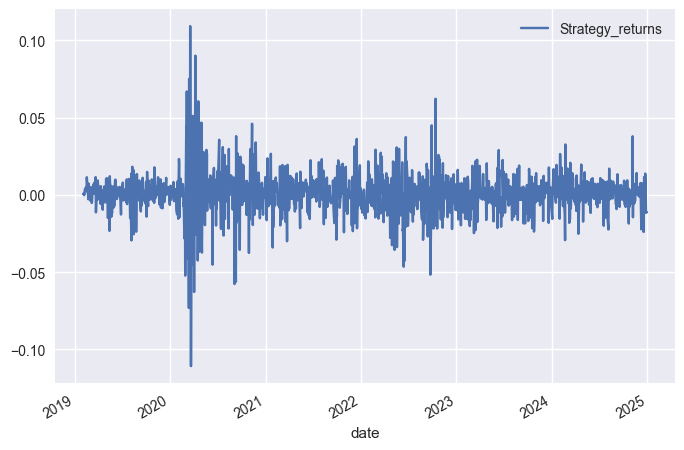

In [245]:
portfolio_df.plot()

In [246]:
portfolio_df = portfolio_df.drop_duplicates()
portfolio_df

,Strategy_returns
date,
2019-02-01,0.000486
2019-02-04,0.001004
2019-02-05,-0.000222
2019-02-06,0.000704
2019-02-07,0.002681
...,...
2024-12-23,-0.000353
2024-12-24,0.013736
2024-12-26,0.000636


In [232]:
spy = yf.download(tickers='SPY',
                   start=portfolio_df.index.get_level_values('date').unique()[0],
                   end=portfolio_df.index.get_level_values('date').unique()[-1])
spy.columns = spy.columns.get_level_values(0)

spy

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2018-02-01,251.432266,252.753818,250.628631,250.976889,90102500
2018-02-02,245.958603,250.226825,245.922878,250.092863,173174800
2018-02-05,235.672043,246.315827,235.118428,244.172791,294681800
2018-02-06,240.315262,240.824241,231.001969,232.109199,355026800
2018-02-07,239.011612,243.199447,238.931224,239.752735,167376100
...,...,...,...,...,...
2024-12-20,591.150024,595.750000,580.909973,581.770020,125716700
2024-12-23,594.690002,595.299988,587.659973,590.890015,57635800
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100


In [247]:
spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-02-01,251.432266,252.753818,250.628631,250.976889,90102500
2018-02-02,245.958603,250.226825,245.922878,250.092863,173174800
2018-02-05,235.672043,246.315827,235.118428,244.172791,294681800
2018-02-06,240.315262,240.824241,231.001969,232.109199,355026800
2018-02-07,239.011612,243.199447,238.931224,239.752735,167376100
...,...,...,...,...,...
2024-12-20,591.150024,595.750000,580.909973,581.770020,125716700
2024-12-23,594.690002,595.299988,587.659973,590.890015,57635800
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100


In [248]:
portfolio_df

,Strategy_returns
date,
2019-02-01,0.000486
2019-02-04,0.001004
2019-02-05,-0.000222
2019-02-06,0.000704
2019-02-07,0.002681
...,...
2024-12-23,-0.000353
2024-12-24,0.013736
2024-12-26,0.000636


In [249]:
spy

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-02-01,251.432266,252.753818,250.628631,250.976889,90102500
2018-02-02,245.958603,250.226825,245.922878,250.092863,173174800
2018-02-05,235.672043,246.315827,235.118428,244.172791,294681800
2018-02-06,240.315262,240.824241,231.001969,232.109199,355026800
2018-02-07,239.011612,243.199447,238.931224,239.752735,167376100
...,...,...,...,...,...
2024-12-20,591.150024,595.750000,580.909973,581.770020,125716700
2024-12-23,594.690002,595.299988,587.659973,590.890015,57635800
2024-12-24,601.299988,601.340027,595.469971,596.059998,33160100


In [251]:
spy_ret = np.log(spy[['Close']]).diff().dropna().rename({'Close':'SPY Buy&Hold'}, axis=1)
portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)
portfolio_df


,Strategy_returns,SPY Buy&Hold
2019-02-01,0.000486,0.000482
2019-02-04,0.001004,0.007010
2019-02-05,-0.000222,0.004183
2019-02-06,0.000704,-0.001319
2019-02-07,0.002681,-0.009578
...,...,...
2024-12-20,0.011587,0.011939
2024-12-23,-0.000353,0.005970
2024-12-24,0.013736,0.011054
2024-12-26,0.000636,0.000067


<Axes: >

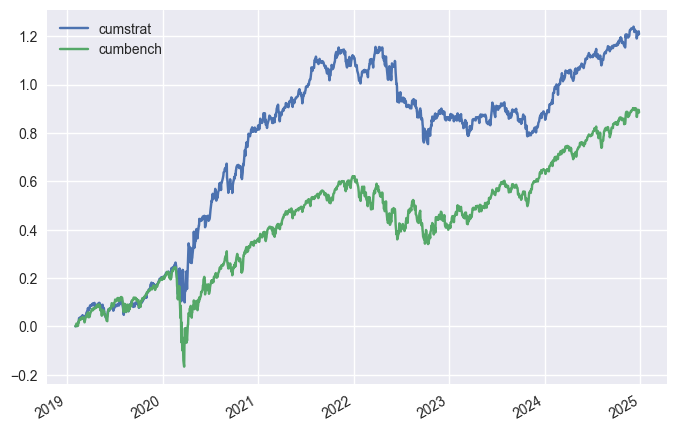

In [252]:
plt.style.use('seaborn-v0_8')
portfolio_df['cumstrat'] = portfolio_df['Strategy_returns'].cumsum()
portfolio_df['cumbench'] = portfolio_df['SPY Buy&Hold'].cumsum()
portfolio_df[['cumstrat', 'cumbench']].plot()

In [253]:
portfolio_df['Strategy_returns'].mean()*252

0.20477743648138239

In [254]:
portfolio_df['SPY Buy&Hold'].mean()*252

0.14995299843038232